# 예측 모델
 > ## 1. MLP(hidden layer 1개, tensorflow)
 ## 2. MLP(hidden layer 2개, tensorflow)
 ## 3. MLP, DNN(keras)
 ## 4. Randomforest
 ## 5. XGBoost
 ## 6. LightGBM
 ## 7. Lasso
 ## 8. ElasticNet

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm
from scipy import stats
from sklearn.cross_validation import train_test_split
from sklearn.cross_validation import cross_val_score
from sklearn.metrics import make_scorer, mean_squared_error

import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

/home/airi/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
# 처리해놓은 데이터 로딩
train_file = "./data/train_2.csv"
test_file = "./data/test_2.csv"

x_train = pd.read_csv(train_file, engine='python')
x_test = pd.read_csv(test_file, engine='python')

In [3]:
y_train = x_train.SalePrice
x_train.drop(['SalePrice'], axis=1, inplace=True)

In [4]:
display(x_train.head())
display(x_test.head())

,1stFlrSF,2ndFlrSF,3SsnPorch,BedroomAbvGr,BsmtFullBath,BsmtHalfBath,BsmtUnfSF,EnclosedPorch,Fireplaces,FullBath,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,Street_Grvl,Street_Pave,Utilities_AllPub,Utilities_NoSeWa,Utilities_None
0,-0.784689,1.214179,-0.112313,0.251255,1.129973,-0.251374,-0.547956,-0.423910,-0.979803,0.810093,...,0,0,0,0,1,0,1,1,0,0
1,0.403194,-0.859795,-0.112313,0.251255,-0.833091,3.880135,-0.132294,-0.423910,0.751112,0.810093,...,0,0,0,0,1,0,1,1,0,0
2,-0.569273,1.220996,-0.112313,0.251255,1.129973,-0.251374,0.167200,-0.423910,0.751112,0.810093,...,0,0,0,0,1,0,1,1,0,0
3,-0.437869,1.155241,-0.112313,0.251255,1.129973,-0.251374,0.329240,2.903308,0.751112,-1.027091,...,0,0,0,0,1,0,1,1,0,0
4,0.098904,1.318031,-0.112313,1.273273,1.129973,-0.251374,0.256527,-0.423910,0.751112,0.810093,...,0,0,0,0,1,0,1,1,0,0


,1stFlrSF,2ndFlrSF,3SsnPorch,BedroomAbvGr,BsmtFullBath,BsmtHalfBath,BsmtUnfSF,EnclosedPorch,Fireplaces,FullBath,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,Street_Grvl,Street_Pave,Utilities_AllPub,Utilities_NoSeWa,Utilities_None
0,-0.648517,-0.859795,-0.112313,-1.016868,-0.833091,-0.251374,-0.166720,-0.42391,-0.979803,-1.027091,...,0,0,0,0,1,0,1,1,0,0
1,0.566804,-0.859795,-0.112313,0.251255,-0.833091,-0.251374,0.118809,-0.42391,-0.979803,-1.027091,...,0,0,0,0,1,0,1,1,0,0
2,-0.543248,1.119259,-0.112313,0.251255,-0.833091,-0.251374,-0.603727,-0.42391,0.751112,0.810093,...,0,0,0,0,1,0,1,1,0,0
3,-0.549736,1.103498,-0.112313,0.251255,-0.833091,-0.251374,-0.041299,-0.42391,0.751112,0.810093,...,0,0,0,0,1,0,1,1,0,0
4,0.447860,-0.859795,-0.112313,-1.016868,-0.833091,-0.251374,0.830074,-0.42391,-0.979803,0.810093,...,0,0,0,0,1,0,1,1,0,0


- - -
### log-transformation
 saleprice 정규화를 위한 log-transformation

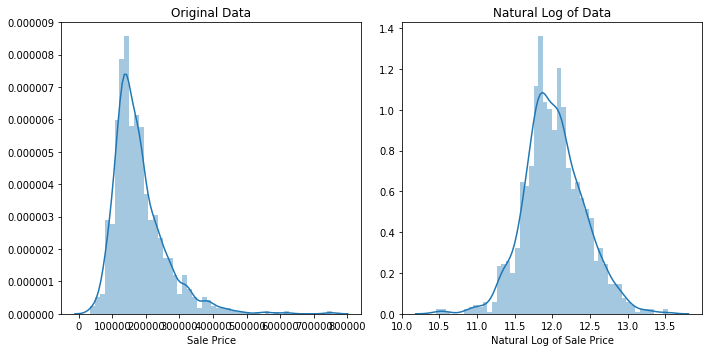

In [5]:
y_train_log = np.log(y_train)

plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
sns.distplot(y_train, bins=50)
plt.title('Original Data')
plt.xlabel('Sale Price')

plt.subplot(1,2,2)
sns.distplot(y_train_log, bins=50)
plt.title('Natural Log of Data')
plt.xlabel('Natural Log of Sale Price')
plt.tight_layout()

### score 도출해주는 함수 선언

In [6]:
def rmsle(y, y_pred):
    return np.sqrt(mean_squared_error(y, y_pred))

지금까지가 데이터 로딩이다. 추후 1번부터 6번까지 모델 정의 및 label 예측이다.<br>
1, 4, 5, 6은 직접적으로 예측에 사용한다. 2, 3은 모델은 정의했지만 생각대로 예측이 정확하게 되지 않아 배제하였다.

- - -
 # 1. MLP(hidden layer 1개, tensorflow)

In [7]:
import tensorflow as tf
import math
from sklearn.model_selection import train_test_split

x_train_np = x_train.as_matrix()
# y_train_np = y_train_log.as_matrix()
x_test_np = x_test.as_matrix()

### hyperparameter init

In [8]:
'''
    num_unit1 : hidden layer의 뉴런 개수
    keepout : keepout rate
    step : 학습 횟수
    learning_rate : optimizer learning rate
'''
num_unit1 = 200
keepout = 0.5
step = 10000
learning_rate = 0.003
batch_size = 30

### 학습 모델(hidden layer 1개)

In [9]:
'''
    y_ : Input labels
    keep_prob : keepout rate
'''
y_ = tf.placeholder(tf.float32, [None,1])
keep_prob = tf.placeholder(tf.float32)

# weight, bias
W1 = tf.Variable(tf.truncated_normal([x_train.shape[1], num_unit1],
                                          stddev=0.1))
b1 = tf.Variable(tf.constant(0., shape = [num_unit1]))

W0 = tf.Variable(tf.truncated_normal([num_unit1, 1],
                                     stddev=0.1))
b0 = tf.Variable(tf.constant(0., shape = [1]))

# Input layer
x1 = tf.placeholder(tf.float32, [None, x_train.shape[1]])

# Hidden1 layer
hidden1 = tf.nn.relu(tf.matmul(x1, W1) + b1)
# hidden1 = (tf.matmul(x1, W1) + b1)
hidden1_drop = tf.nn.dropout(hidden1, keep_prob)

# Output layer(Labels_predict)
k = tf.matmul(hidden1_drop, W0) + b0

'''
    cost func : MSE
    optimizer : adam
'''
cost = tf.losses.mean_squared_error(labels = y_, predictions = k)
lr = tf.placeholder(tf.float32)
train_step = tf.train.AdamOptimizer(lr).minimize(cost)

### 학습 / 검증(split data로 train)

In [10]:
x_train1, x_train2, y_train1, y_train2 = train_test_split(x_train_np,
                                                    y_train_log,
                                                    test_size=0.33,
                                                    random_state=7)
# mini batch를 일단 없애고 진행했다.
batch_size = x_train1.shape[0]

print ("Training\n")
sess = tf.Session()
init = tf.global_variables_initializer() #.run()
sess.run(init)

# tensorboard를 사용하기 위하여 summary.scalar를 사용
tf.summary.scalar('loss', cost)
merged = tf.summary.merge_all()
train_writer = tf.summary.FileWriter('./tensorboard', sess.graph)

# (?, ) -> (?, 1)
y_train_log = y_train_log.reshape([y_train_log.shape[0], 1])
y_train1 = y_train1.reshape([y_train1.shape[0], 1])
y_train2 = y_train2.reshape([y_train2.shape[0], 1])

j=0
for _ in range(step):
    j += 1

    batch_count = int(math.ceil(x_train1.shape[0]/batch_size))
    for i in range(batch_count):
        batch_xs1, batch_ys1 = x_train1[batch_size * i : batch_size*(i+1)], y_train1[batch_size * i : batch_size*(i+1)]
        sess.run(train_step,
                            feed_dict={x1: batch_xs1, y_: batch_ys1, keep_prob:keepout, lr : learning_rate})
        summary = sess.run(merged,
                            feed_dict={x1: x_train2, y_: y_train2, keep_prob:keepout, lr : learning_rate})
        train_writer.add_summary(summary, j)
        if i*batch_size % 300 == 0 :
            print('step : {}, batch : {}'.format(j, i*batch_size), end='\t\t')
            print ('loss :',sess.run(cost, feed_dict={x1: x_train1, y_: y_train1, keep_prob:keepout, lr : learning_rate}), 
                   'valid_loss :', sess.run(cost, feed_dict={x1: x_train2, y_: y_train2, keep_prob:keepout, lr : learning_rate}))
train_writer.close()


Training

step : 1, batch : 0		loss : 114.64455 valid_loss : 113.811714
step : 2, batch : 0		loss : 91.383736 valid_loss : 89.937874
step : 3, batch : 0		loss : 70.8415 valid_loss : 70.33495
step : 4, batch : 0		loss : 52.10437 valid_loss : 52.612537
step : 5, batch : 0		loss : 36.406223 valid_loss : 36.26111
step : 6, batch : 0		loss : 22.48232 valid_loss : 23.503008
step : 7, batch : 0		loss : 12.676386 valid_loss : 12.2988405
step : 8, batch : 0		loss : 5.9165373 valid_loss : 5.921191
step : 9, batch : 0		loss : 3.008423 valid_loss : 3.1808677
step : 10, batch : 0		loss : 3.8645809 valid_loss : 3.8010328
step : 11, batch : 0		loss : 8.327181 valid_loss : 7.5814233
step : 12, batch : 0		loss : 12.317166 valid_loss : 13.327538
step : 13, batch : 0		loss : 15.556989 valid_loss : 16.137886
step : 14, batch : 0		loss : 15.854382 valid_loss : 16.794895
step : 15, batch : 0		loss : 16.26907 valid_loss : 14.94453
step : 16, batch : 0		loss : 12.455655 valid_loss : 12.863747
step : 17, batch

step : 150, batch : 0		loss : 1.7572399 valid_loss : 1.7880527
step : 151, batch : 0		loss : 1.8522743 valid_loss : 2.0044808
step : 152, batch : 0		loss : 1.6704696 valid_loss : 1.8521882
step : 153, batch : 0		loss : 1.8394861 valid_loss : 1.7590978
step : 154, batch : 0		loss : 1.7051929 valid_loss : 1.8390447
step : 155, batch : 0		loss : 1.8286813 valid_loss : 1.8905494
step : 156, batch : 0		loss : 1.8722726 valid_loss : 1.8661534
step : 157, batch : 0		loss : 1.8065404 valid_loss : 1.6840513
step : 158, batch : 0		loss : 1.8391335 valid_loss : 1.7052228
step : 159, batch : 0		loss : 1.7372766 valid_loss : 2.0423098
step : 160, batch : 0		loss : 1.6763959 valid_loss : 1.6069899
step : 161, batch : 0		loss : 1.681362 valid_loss : 1.7099164
step : 162, batch : 0		loss : 1.6931183 valid_loss : 1.7780458
step : 163, batch : 0		loss : 1.6457423 valid_loss : 1.8224413
step : 164, batch : 0		loss : 1.8036664 valid_loss : 1.8959578
step : 165, batch : 0		loss : 1.746797 valid_loss : 1.67

step : 290, batch : 0		loss : 1.5185407 valid_loss : 1.3063271
step : 291, batch : 0		loss : 1.4770327 valid_loss : 1.4273732
step : 292, batch : 0		loss : 1.502851 valid_loss : 1.2950402
step : 293, batch : 0		loss : 1.4614803 valid_loss : 1.6214035
step : 294, batch : 0		loss : 1.4329293 valid_loss : 1.6451943
step : 295, batch : 0		loss : 1.5227827 valid_loss : 1.540542
step : 296, batch : 0		loss : 1.4536726 valid_loss : 1.3894233
step : 297, batch : 0		loss : 1.4507668 valid_loss : 1.542011
step : 298, batch : 0		loss : 1.4877511 valid_loss : 1.4690964
step : 299, batch : 0		loss : 1.5954344 valid_loss : 1.4547776
step : 300, batch : 0		loss : 1.5277677 valid_loss : 1.5835383
step : 301, batch : 0		loss : 1.5733366 valid_loss : 1.4517577
step : 302, batch : 0		loss : 1.5495867 valid_loss : 1.464616
step : 303, batch : 0		loss : 1.5724977 valid_loss : 1.5398768
step : 304, batch : 0		loss : 1.3804263 valid_loss : 1.5337245
step : 305, batch : 0		loss : 1.4892651 valid_loss : 1.5484

step : 435, batch : 0		loss : 1.2818946 valid_loss : 1.3827116
step : 436, batch : 0		loss : 1.2650337 valid_loss : 1.391909
step : 437, batch : 0		loss : 1.3724982 valid_loss : 1.3558939
step : 438, batch : 0		loss : 1.4545212 valid_loss : 1.3244
step : 439, batch : 0		loss : 1.2784836 valid_loss : 1.4250951
step : 440, batch : 0		loss : 1.3716694 valid_loss : 1.2848957
step : 441, batch : 0		loss : 1.295603 valid_loss : 1.1105067
step : 442, batch : 0		loss : 1.3164126 valid_loss : 1.4110941
step : 443, batch : 0		loss : 1.3330517 valid_loss : 1.1905454
step : 444, batch : 0		loss : 1.288339 valid_loss : 1.3710319
step : 445, batch : 0		loss : 1.2169147 valid_loss : 1.3273807
step : 446, batch : 0		loss : 1.3239868 valid_loss : 1.3663032
step : 447, batch : 0		loss : 1.3347604 valid_loss : 1.2342209
step : 448, batch : 0		loss : 1.2409062 valid_loss : 1.5430559
step : 449, batch : 0		loss : 1.3040041 valid_loss : 1.473811
step : 450, batch : 0		loss : 1.3118125 valid_loss : 1.4845626

step : 575, batch : 0		loss : 1.2147162 valid_loss : 1.4519544
step : 576, batch : 0		loss : 1.3054624 valid_loss : 1.2945338
step : 577, batch : 0		loss : 1.2397845 valid_loss : 1.3272415
step : 578, batch : 0		loss : 1.3226709 valid_loss : 1.2855507
step : 579, batch : 0		loss : 1.2717777 valid_loss : 1.225027
step : 580, batch : 0		loss : 1.1953031 valid_loss : 1.2362767
step : 581, batch : 0		loss : 1.3315359 valid_loss : 1.367134
step : 582, batch : 0		loss : 1.2612699 valid_loss : 1.308297
step : 583, batch : 0		loss : 1.2288975 valid_loss : 1.2950113
step : 584, batch : 0		loss : 1.35951 valid_loss : 1.2458657
step : 585, batch : 0		loss : 1.2956376 valid_loss : 1.324112
step : 586, batch : 0		loss : 1.338867 valid_loss : 1.3214335
step : 587, batch : 0		loss : 1.1491988 valid_loss : 1.2570167
step : 588, batch : 0		loss : 1.1959574 valid_loss : 1.3259965
step : 589, batch : 0		loss : 1.2467471 valid_loss : 1.2679557
step : 590, batch : 0		loss : 1.3294507 valid_loss : 1.2834482

step : 713, batch : 0		loss : 1.2590933 valid_loss : 1.3128206
step : 714, batch : 0		loss : 1.1496457 valid_loss : 1.1984435
step : 715, batch : 0		loss : 1.199349 valid_loss : 1.1789125
step : 716, batch : 0		loss : 1.3155246 valid_loss : 1.2191812
step : 717, batch : 0		loss : 1.2490939 valid_loss : 1.3832722
step : 718, batch : 0		loss : 1.3407313 valid_loss : 1.0892719
step : 719, batch : 0		loss : 1.1820511 valid_loss : 1.3537722
step : 720, batch : 0		loss : 1.2124256 valid_loss : 1.218321
step : 721, batch : 0		loss : 1.1515586 valid_loss : 1.2569034
step : 722, batch : 0		loss : 1.1760459 valid_loss : 1.2858745
step : 723, batch : 0		loss : 1.1511929 valid_loss : 1.3418397
step : 724, batch : 0		loss : 1.198213 valid_loss : 1.1594726
step : 725, batch : 0		loss : 1.2163527 valid_loss : 1.2591298
step : 726, batch : 0		loss : 1.2889969 valid_loss : 1.2655567
step : 727, batch : 0		loss : 1.2737259 valid_loss : 1.2586185
step : 728, batch : 0		loss : 1.2008296 valid_loss : 1.274

step : 868, batch : 0		loss : 1.1113297 valid_loss : 1.2129062
step : 869, batch : 0		loss : 1.1638286 valid_loss : 1.0667963
step : 870, batch : 0		loss : 1.2119222 valid_loss : 1.25534
step : 871, batch : 0		loss : 1.1748085 valid_loss : 1.2099043
step : 872, batch : 0		loss : 1.2174978 valid_loss : 1.1418581
step : 873, batch : 0		loss : 1.1326324 valid_loss : 1.1977286
step : 874, batch : 0		loss : 1.3224648 valid_loss : 1.2225773
step : 875, batch : 0		loss : 1.2050734 valid_loss : 1.1248752
step : 876, batch : 0		loss : 1.1535559 valid_loss : 1.1958697
step : 877, batch : 0		loss : 1.2122076 valid_loss : 1.1032488
step : 878, batch : 0		loss : 1.2104589 valid_loss : 1.288335
step : 879, batch : 0		loss : 1.1820033 valid_loss : 1.286671
step : 880, batch : 0		loss : 1.1755962 valid_loss : 1.2855327
step : 881, batch : 0		loss : 1.0873123 valid_loss : 1.2519642
step : 882, batch : 0		loss : 1.1556789 valid_loss : 1.0527389
step : 883, batch : 0		loss : 1.1306189 valid_loss : 1.2680

step : 1017, batch : 0		loss : 1.0743839 valid_loss : 1.1838785
step : 1018, batch : 0		loss : 1.239539 valid_loss : 1.1300763
step : 1019, batch : 0		loss : 1.063797 valid_loss : 1.1712624
step : 1020, batch : 0		loss : 1.1021509 valid_loss : 1.1129891
step : 1021, batch : 0		loss : 1.0639939 valid_loss : 1.1464617
step : 1022, batch : 0		loss : 1.2058223 valid_loss : 1.1191388
step : 1023, batch : 0		loss : 1.05877 valid_loss : 1.1648227
step : 1024, batch : 0		loss : 1.0852757 valid_loss : 1.1986469
step : 1025, batch : 0		loss : 1.0999402 valid_loss : 1.1885356
step : 1026, batch : 0		loss : 1.2837383 valid_loss : 1.0055748
step : 1027, batch : 0		loss : 1.0878273 valid_loss : 1.2105677
step : 1028, batch : 0		loss : 1.2543181 valid_loss : 1.3340906
step : 1029, batch : 0		loss : 1.2544713 valid_loss : 1.1809008
step : 1030, batch : 0		loss : 1.1138487 valid_loss : 1.1918236
step : 1031, batch : 0		loss : 1.2296455 valid_loss : 1.2372427
step : 1032, batch : 0		loss : 1.1790483 val

step : 1166, batch : 0		loss : 1.1068583 valid_loss : 1.0392913
step : 1167, batch : 0		loss : 1.1664282 valid_loss : 1.157928
step : 1168, batch : 0		loss : 1.1886169 valid_loss : 1.1356099
step : 1169, batch : 0		loss : 1.1369047 valid_loss : 1.1279342
step : 1170, batch : 0		loss : 1.1463569 valid_loss : 1.130561
step : 1171, batch : 0		loss : 1.1238428 valid_loss : 1.0711685
step : 1172, batch : 0		loss : 1.1027265 valid_loss : 1.2254182
step : 1173, batch : 0		loss : 1.1367925 valid_loss : 1.1895077
step : 1174, batch : 0		loss : 1.1368226 valid_loss : 1.1757872
step : 1175, batch : 0		loss : 1.1073903 valid_loss : 1.1497995
step : 1176, batch : 0		loss : 1.1242213 valid_loss : 1.2995536
step : 1177, batch : 0		loss : 1.0833378 valid_loss : 1.0421631
step : 1178, batch : 0		loss : 1.1284466 valid_loss : 1.1757724
step : 1179, batch : 0		loss : 1.0203899 valid_loss : 1.1353176
step : 1180, batch : 0		loss : 1.0694405 valid_loss : 1.1749784
step : 1181, batch : 0		loss : 1.1205472 v

step : 1316, batch : 0		loss : 1.0430341 valid_loss : 1.1692172
step : 1317, batch : 0		loss : 1.0293609 valid_loss : 1.1053414
step : 1318, batch : 0		loss : 1.0894183 valid_loss : 1.2029375
step : 1319, batch : 0		loss : 1.0885483 valid_loss : 1.0145589
step : 1320, batch : 0		loss : 1.1779469 valid_loss : 1.0596828
step : 1321, batch : 0		loss : 1.0640242 valid_loss : 1.0047317
step : 1322, batch : 0		loss : 1.0601469 valid_loss : 1.2207556
step : 1323, batch : 0		loss : 1.0142843 valid_loss : 1.0434835
step : 1324, batch : 0		loss : 1.0445563 valid_loss : 1.0495842
step : 1325, batch : 0		loss : 1.0487422 valid_loss : 0.9871704
step : 1326, batch : 0		loss : 0.9829741 valid_loss : 1.1046788
step : 1327, batch : 0		loss : 1.0370127 valid_loss : 1.0662688
step : 1328, batch : 0		loss : 1.1056712 valid_loss : 1.1702169
step : 1329, batch : 0		loss : 1.0466269 valid_loss : 0.99687076
step : 1330, batch : 0		loss : 1.0955211 valid_loss : 1.1174688
step : 1331, batch : 0		loss : 1.138281

step : 1462, batch : 0		loss : 1.009281 valid_loss : 1.096668
step : 1463, batch : 0		loss : 1.0982988 valid_loss : 1.0767123
step : 1464, batch : 0		loss : 1.1272266 valid_loss : 1.1306106
step : 1465, batch : 0		loss : 1.110722 valid_loss : 1.155133
step : 1466, batch : 0		loss : 1.0043631 valid_loss : 1.2135049
step : 1467, batch : 0		loss : 0.9623256 valid_loss : 1.2032225
step : 1468, batch : 0		loss : 1.0475994 valid_loss : 1.0818183
step : 1469, batch : 0		loss : 1.0560856 valid_loss : 1.0100107
step : 1470, batch : 0		loss : 1.0186793 valid_loss : 1.16301
step : 1471, batch : 0		loss : 1.0577643 valid_loss : 1.0369089
step : 1472, batch : 0		loss : 1.0062675 valid_loss : 0.9416414
step : 1473, batch : 0		loss : 1.0122269 valid_loss : 1.0951902
step : 1474, batch : 0		loss : 1.0171771 valid_loss : 1.0351176
step : 1475, batch : 0		loss : 0.9571193 valid_loss : 1.2020184
step : 1476, batch : 0		loss : 1.0557007 valid_loss : 1.1242555
step : 1477, batch : 0		loss : 1.0935744 valid

step : 1608, batch : 0		loss : 1.0427463 valid_loss : 1.0466329
step : 1609, batch : 0		loss : 1.0821542 valid_loss : 1.010237
step : 1610, batch : 0		loss : 0.99978447 valid_loss : 1.16309
step : 1611, batch : 0		loss : 1.0316879 valid_loss : 0.9919274
step : 1612, batch : 0		loss : 1.0532542 valid_loss : 1.0138994
step : 1613, batch : 0		loss : 0.9641141 valid_loss : 1.1175659
step : 1614, batch : 0		loss : 1.012064 valid_loss : 1.1310443
step : 1615, batch : 0		loss : 1.1162753 valid_loss : 1.1365703
step : 1616, batch : 0		loss : 1.0676891 valid_loss : 0.98900884
step : 1617, batch : 0		loss : 0.97468513 valid_loss : 0.9226922
step : 1618, batch : 0		loss : 1.1295612 valid_loss : 1.068813
step : 1619, batch : 0		loss : 1.0871882 valid_loss : 1.0130917
step : 1620, batch : 0		loss : 1.062316 valid_loss : 1.0943295
step : 1621, batch : 0		loss : 1.0345844 valid_loss : 1.1191317
step : 1622, batch : 0		loss : 1.0573775 valid_loss : 1.0531572
step : 1623, batch : 0		loss : 0.99912906 v

step : 1752, batch : 0		loss : 1.0111588 valid_loss : 1.0489157
step : 1753, batch : 0		loss : 1.0477967 valid_loss : 1.052054
step : 1754, batch : 0		loss : 0.98521 valid_loss : 1.1080655
step : 1755, batch : 0		loss : 1.0619783 valid_loss : 1.2284896
step : 1756, batch : 0		loss : 0.93755794 valid_loss : 0.99013805
step : 1757, batch : 0		loss : 0.98169935 valid_loss : 1.1592747
step : 1758, batch : 0		loss : 1.0261105 valid_loss : 1.0954577
step : 1759, batch : 0		loss : 1.0896494 valid_loss : 0.91290486
step : 1760, batch : 0		loss : 1.1025892 valid_loss : 1.0390495
step : 1761, batch : 0		loss : 1.1305437 valid_loss : 1.087945
step : 1762, batch : 0		loss : 0.99685955 valid_loss : 1.1187016
step : 1763, batch : 0		loss : 0.98858714 valid_loss : 1.1222082
step : 1764, batch : 0		loss : 1.0806763 valid_loss : 1.0288497
step : 1765, batch : 0		loss : 0.9970766 valid_loss : 0.95721513
step : 1766, batch : 0		loss : 0.99811035 valid_loss : 1.2682717
step : 1767, batch : 0		loss : 1.015

step : 1896, batch : 0		loss : 0.977234 valid_loss : 0.9103457
step : 1897, batch : 0		loss : 0.9465703 valid_loss : 1.0220532
step : 1898, batch : 0		loss : 1.0953895 valid_loss : 0.9736076
step : 1899, batch : 0		loss : 0.9695236 valid_loss : 0.94651395
step : 1900, batch : 0		loss : 0.9477344 valid_loss : 1.2028311
step : 1901, batch : 0		loss : 1.0269524 valid_loss : 0.95890033
step : 1902, batch : 0		loss : 0.8911755 valid_loss : 1.1147935
step : 1903, batch : 0		loss : 1.0841482 valid_loss : 0.9912744
step : 1904, batch : 0		loss : 0.9863075 valid_loss : 1.0858853
step : 1905, batch : 0		loss : 1.0161825 valid_loss : 1.0951147
step : 1906, batch : 0		loss : 1.0931607 valid_loss : 0.92642444
step : 1907, batch : 0		loss : 0.9869159 valid_loss : 1.0950931
step : 1908, batch : 0		loss : 1.0225337 valid_loss : 1.1094054
step : 1909, batch : 0		loss : 1.0785831 valid_loss : 1.093988
step : 1910, batch : 0		loss : 1.1079533 valid_loss : 0.9529639
step : 1911, batch : 0		loss : 1.118974

step : 2040, batch : 0		loss : 0.9642797 valid_loss : 0.9198823
step : 2041, batch : 0		loss : 0.92999566 valid_loss : 0.96018755
step : 2042, batch : 0		loss : 1.0186759 valid_loss : 0.9926125
step : 2043, batch : 0		loss : 0.96841407 valid_loss : 0.9902129
step : 2044, batch : 0		loss : 0.9959365 valid_loss : 0.9850834
step : 2045, batch : 0		loss : 0.9944835 valid_loss : 0.94540685
step : 2046, batch : 0		loss : 0.87120426 valid_loss : 1.0851172
step : 2047, batch : 0		loss : 0.99065834 valid_loss : 1.0249276
step : 2048, batch : 0		loss : 0.94942915 valid_loss : 1.0587372
step : 2049, batch : 0		loss : 0.9300027 valid_loss : 1.0175668
step : 2050, batch : 0		loss : 0.97988224 valid_loss : 1.0393152
step : 2051, batch : 0		loss : 0.9408772 valid_loss : 1.1233059
step : 2052, batch : 0		loss : 0.9653453 valid_loss : 0.9841684
step : 2053, batch : 0		loss : 0.9856238 valid_loss : 0.9991861
step : 2054, batch : 0		loss : 0.95800686 valid_loss : 0.8494427
step : 2055, batch : 0		loss : 

step : 2185, batch : 0		loss : 0.9410012 valid_loss : 1.0163771
step : 2186, batch : 0		loss : 0.91914433 valid_loss : 1.0896842
step : 2187, batch : 0		loss : 0.9492716 valid_loss : 0.9529759
step : 2188, batch : 0		loss : 0.9138589 valid_loss : 0.97862613
step : 2189, batch : 0		loss : 0.967496 valid_loss : 0.91197157
step : 2190, batch : 0		loss : 0.94113076 valid_loss : 0.87883383
step : 2191, batch : 0		loss : 0.98658556 valid_loss : 0.95099854
step : 2192, batch : 0		loss : 1.0435841 valid_loss : 1.1171515
step : 2193, batch : 0		loss : 0.97845 valid_loss : 0.87885344
step : 2194, batch : 0		loss : 0.953026 valid_loss : 0.9805585
step : 2195, batch : 0		loss : 0.8770926 valid_loss : 1.0035619
step : 2196, batch : 0		loss : 0.98780906 valid_loss : 0.85680234
step : 2197, batch : 0		loss : 0.96358657 valid_loss : 0.9568564
step : 2198, batch : 0		loss : 0.93871844 valid_loss : 1.0015727
step : 2199, batch : 0		loss : 0.97216743 valid_loss : 0.9281782
step : 2200, batch : 0		loss : 

step : 2328, batch : 0		loss : 0.90567166 valid_loss : 1.0049123
step : 2329, batch : 0		loss : 0.94604605 valid_loss : 0.9779703
step : 2330, batch : 0		loss : 0.91717356 valid_loss : 0.9347889
step : 2331, batch : 0		loss : 1.0503684 valid_loss : 0.9359271
step : 2332, batch : 0		loss : 0.91184986 valid_loss : 0.99455196
step : 2333, batch : 0		loss : 0.94255465 valid_loss : 1.0056171
step : 2334, batch : 0		loss : 0.9450246 valid_loss : 0.85047185
step : 2335, batch : 0		loss : 0.93321747 valid_loss : 0.9838954
step : 2336, batch : 0		loss : 0.8710215 valid_loss : 0.79124177
step : 2337, batch : 0		loss : 0.85930955 valid_loss : 0.95521104
step : 2338, batch : 0		loss : 0.9847167 valid_loss : 1.0544976
step : 2339, batch : 0		loss : 0.9406551 valid_loss : 0.9063856
step : 2340, batch : 0		loss : 0.8960606 valid_loss : 0.9712608
step : 2341, batch : 0		loss : 0.9312118 valid_loss : 0.8627281
step : 2342, batch : 0		loss : 0.9530469 valid_loss : 0.8974379
step : 2343, batch : 0		loss 

step : 2472, batch : 0		loss : 0.93019736 valid_loss : 0.87994885
step : 2473, batch : 0		loss : 0.9077623 valid_loss : 0.94337755
step : 2474, batch : 0		loss : 0.9054876 valid_loss : 0.8832631
step : 2475, batch : 0		loss : 0.8576219 valid_loss : 0.90592736
step : 2476, batch : 0		loss : 0.8599819 valid_loss : 0.8717438
step : 2477, batch : 0		loss : 0.9315195 valid_loss : 0.9387395
step : 2478, batch : 0		loss : 0.9215318 valid_loss : 0.90441364
step : 2479, batch : 0		loss : 0.8278645 valid_loss : 0.9160633
step : 2480, batch : 0		loss : 0.87628824 valid_loss : 0.85384965
step : 2481, batch : 0		loss : 0.90764135 valid_loss : 0.9724399
step : 2482, batch : 0		loss : 0.873466 valid_loss : 0.8600431
step : 2483, batch : 0		loss : 0.8860457 valid_loss : 0.84003025
step : 2484, batch : 0		loss : 0.9111161 valid_loss : 0.901012
step : 2485, batch : 0		loss : 0.88167435 valid_loss : 0.85680634
step : 2486, batch : 0		loss : 0.8390051 valid_loss : 0.94650203
step : 2487, batch : 0		loss :

step : 2617, batch : 0		loss : 0.88855225 valid_loss : 0.8457775
step : 2618, batch : 0		loss : 0.88891184 valid_loss : 0.8627861
step : 2619, batch : 0		loss : 0.8594465 valid_loss : 0.9228163
step : 2620, batch : 0		loss : 0.7995611 valid_loss : 0.8598532
step : 2621, batch : 0		loss : 0.8946637 valid_loss : 0.8985257
step : 2622, batch : 0		loss : 0.87178016 valid_loss : 0.89335036
step : 2623, batch : 0		loss : 0.8050556 valid_loss : 0.95097756
step : 2624, batch : 0		loss : 0.8674295 valid_loss : 0.8532463
step : 2625, batch : 0		loss : 0.843263 valid_loss : 0.8637933
step : 2626, batch : 0		loss : 0.8926692 valid_loss : 0.85077804
step : 2627, batch : 0		loss : 0.904487 valid_loss : 0.8400842
step : 2628, batch : 0		loss : 0.86858606 valid_loss : 0.94744986
step : 2629, batch : 0		loss : 0.8288281 valid_loss : 0.8969095
step : 2630, batch : 0		loss : 0.9538515 valid_loss : 0.85120744
step : 2631, batch : 0		loss : 0.881585 valid_loss : 0.7916272
step : 2632, batch : 0		loss : 0.9

step : 2762, batch : 0		loss : 0.90014607 valid_loss : 0.89395356
step : 2763, batch : 0		loss : 0.8694584 valid_loss : 0.97777444
step : 2764, batch : 0		loss : 0.8836294 valid_loss : 0.92480755
step : 2765, batch : 0		loss : 0.8796158 valid_loss : 0.8402201
step : 2766, batch : 0		loss : 0.92214733 valid_loss : 0.9162444
step : 2767, batch : 0		loss : 0.83894604 valid_loss : 0.8286638
step : 2768, batch : 0		loss : 0.90634346 valid_loss : 0.94933856
step : 2769, batch : 0		loss : 0.7820094 valid_loss : 0.92951566
step : 2770, batch : 0		loss : 0.78921604 valid_loss : 0.91502357
step : 2771, batch : 0		loss : 0.8873221 valid_loss : 0.9406276
step : 2772, batch : 0		loss : 0.842161 valid_loss : 0.8774426
step : 2773, batch : 0		loss : 0.8493097 valid_loss : 0.9023484
step : 2774, batch : 0		loss : 0.8375999 valid_loss : 0.7929583
step : 2775, batch : 0		loss : 0.8825522 valid_loss : 0.8267179
step : 2776, batch : 0		loss : 0.9037919 valid_loss : 0.98925704
step : 2777, batch : 0		loss 

step : 2907, batch : 0		loss : 0.8315649 valid_loss : 0.9066266
step : 2908, batch : 0		loss : 0.8235375 valid_loss : 0.7467774
step : 2909, batch : 0		loss : 0.819308 valid_loss : 0.8888461
step : 2910, batch : 0		loss : 0.84102124 valid_loss : 0.7999512
step : 2911, batch : 0		loss : 0.83190185 valid_loss : 0.9067057
step : 2912, batch : 0		loss : 0.82431066 valid_loss : 0.89229566
step : 2913, batch : 0		loss : 0.74238807 valid_loss : 0.8152107
step : 2914, batch : 0		loss : 0.8247338 valid_loss : 0.8061572
step : 2915, batch : 0		loss : 0.8381689 valid_loss : 0.7992607
step : 2916, batch : 0		loss : 0.7571635 valid_loss : 0.80064434
step : 2917, batch : 0		loss : 0.87535876 valid_loss : 0.7968713
step : 2918, batch : 0		loss : 0.8206074 valid_loss : 0.9731813
step : 2919, batch : 0		loss : 0.88415617 valid_loss : 0.86773956
step : 2920, batch : 0		loss : 0.87846273 valid_loss : 0.88171375
step : 2921, batch : 0		loss : 0.8102294 valid_loss : 0.8852569
step : 2922, batch : 0		loss :

step : 3052, batch : 0		loss : 0.78016263 valid_loss : 0.8333948
step : 3053, batch : 0		loss : 0.7911138 valid_loss : 0.8554387
step : 3054, batch : 0		loss : 0.87776405 valid_loss : 0.86204076
step : 3055, batch : 0		loss : 0.81937146 valid_loss : 0.8827336
step : 3056, batch : 0		loss : 0.8456069 valid_loss : 0.8092134
step : 3057, batch : 0		loss : 0.76964504 valid_loss : 0.86167634
step : 3058, batch : 0		loss : 0.8339918 valid_loss : 0.77045393
step : 3059, batch : 0		loss : 0.79789 valid_loss : 0.75364804
step : 3060, batch : 0		loss : 0.81073457 valid_loss : 0.7422756
step : 3061, batch : 0		loss : 0.8517577 valid_loss : 0.80909365
step : 3062, batch : 0		loss : 0.8098885 valid_loss : 0.8427177
step : 3063, batch : 0		loss : 0.7625215 valid_loss : 0.7489719
step : 3064, batch : 0		loss : 0.82684433 valid_loss : 0.8189301
step : 3065, batch : 0		loss : 0.81983495 valid_loss : 0.8417922
step : 3066, batch : 0		loss : 0.80227137 valid_loss : 0.73079574
step : 3067, batch : 0		loss

step : 3196, batch : 0		loss : 0.80317336 valid_loss : 0.7988806
step : 3197, batch : 0		loss : 0.78300244 valid_loss : 0.77115864
step : 3198, batch : 0		loss : 0.798494 valid_loss : 0.8239785
step : 3199, batch : 0		loss : 0.70259374 valid_loss : 0.81024504
step : 3200, batch : 0		loss : 0.7785038 valid_loss : 0.8233368
step : 3201, batch : 0		loss : 0.7425076 valid_loss : 0.81340694
step : 3202, batch : 0		loss : 0.7672768 valid_loss : 0.82233906
step : 3203, batch : 0		loss : 0.698112 valid_loss : 0.79596215
step : 3204, batch : 0		loss : 0.7963065 valid_loss : 0.8111065
step : 3205, batch : 0		loss : 0.8047101 valid_loss : 0.74840504
step : 3206, batch : 0		loss : 0.76489633 valid_loss : 0.82276076
step : 3207, batch : 0		loss : 0.75020504 valid_loss : 0.7969505
step : 3208, batch : 0		loss : 0.7959178 valid_loss : 0.7511309
step : 3209, batch : 0		loss : 0.79547733 valid_loss : 0.837168
step : 3210, batch : 0		loss : 0.75903994 valid_loss : 0.7450572
step : 3211, batch : 0		loss 

step : 3341, batch : 0		loss : 0.8005203 valid_loss : 0.8180083
step : 3342, batch : 0		loss : 0.72616476 valid_loss : 0.7929314
step : 3343, batch : 0		loss : 0.7837291 valid_loss : 0.73727405
step : 3344, batch : 0		loss : 0.7795795 valid_loss : 0.8389631
step : 3345, batch : 0		loss : 0.7648867 valid_loss : 0.790958
step : 3346, batch : 0		loss : 0.7760587 valid_loss : 0.7481644
step : 3347, batch : 0		loss : 0.82147396 valid_loss : 0.7788727
step : 3348, batch : 0		loss : 0.7502776 valid_loss : 0.8361234
step : 3349, batch : 0		loss : 0.76331645 valid_loss : 0.76427853
step : 3350, batch : 0		loss : 0.75916284 valid_loss : 0.78895783
step : 3351, batch : 0		loss : 0.77860224 valid_loss : 0.79162616
step : 3352, batch : 0		loss : 0.80253804 valid_loss : 0.7502027
step : 3353, batch : 0		loss : 0.78264517 valid_loss : 0.8060321
step : 3354, batch : 0		loss : 0.78430504 valid_loss : 0.83740985
step : 3355, batch : 0		loss : 0.7154577 valid_loss : 0.7739724
step : 3356, batch : 0		loss

step : 3484, batch : 0		loss : 0.7674926 valid_loss : 0.6815083
step : 3485, batch : 0		loss : 0.700826 valid_loss : 0.6955446
step : 3486, batch : 0		loss : 0.6964823 valid_loss : 0.7861775
step : 3487, batch : 0		loss : 0.7133511 valid_loss : 0.7665382
step : 3488, batch : 0		loss : 0.72585917 valid_loss : 0.82280177
step : 3489, batch : 0		loss : 0.7584968 valid_loss : 0.7631959
step : 3490, batch : 0		loss : 0.7166828 valid_loss : 0.8138573
step : 3491, batch : 0		loss : 0.7184725 valid_loss : 0.78412247
step : 3492, batch : 0		loss : 0.69591475 valid_loss : 0.76391405
step : 3493, batch : 0		loss : 0.70883185 valid_loss : 0.6895013
step : 3494, batch : 0		loss : 0.7614508 valid_loss : 0.80220574
step : 3495, batch : 0		loss : 0.733143 valid_loss : 0.7401666
step : 3496, batch : 0		loss : 0.767816 valid_loss : 0.7690945
step : 3497, batch : 0		loss : 0.6835181 valid_loss : 0.81263524
step : 3498, batch : 0		loss : 0.73944336 valid_loss : 0.73545647
step : 3499, batch : 0		loss : 0.

step : 3628, batch : 0		loss : 0.6790093 valid_loss : 0.7038799
step : 3629, batch : 0		loss : 0.73534554 valid_loss : 0.6848331
step : 3630, batch : 0		loss : 0.71820855 valid_loss : 0.7048882
step : 3631, batch : 0		loss : 0.7060421 valid_loss : 0.6846314
step : 3632, batch : 0		loss : 0.6665323 valid_loss : 0.6897555
step : 3633, batch : 0		loss : 0.71728116 valid_loss : 0.708538
step : 3634, batch : 0		loss : 0.70696497 valid_loss : 0.78809786
step : 3635, batch : 0		loss : 0.73471916 valid_loss : 0.73368126
step : 3636, batch : 0		loss : 0.70117927 valid_loss : 0.6286851
step : 3637, batch : 0		loss : 0.69537145 valid_loss : 0.74029785
step : 3638, batch : 0		loss : 0.7684499 valid_loss : 0.7338202
step : 3639, batch : 0		loss : 0.72230166 valid_loss : 0.7253875
step : 3640, batch : 0		loss : 0.74151057 valid_loss : 0.7316691
step : 3641, batch : 0		loss : 0.7596837 valid_loss : 0.7572756
step : 3642, batch : 0		loss : 0.6851187 valid_loss : 0.7534763
step : 3643, batch : 0		loss 

step : 3772, batch : 0		loss : 0.6967605 valid_loss : 0.71425676
step : 3773, batch : 0		loss : 0.6893611 valid_loss : 0.61845547
step : 3774, batch : 0		loss : 0.707933 valid_loss : 0.6722162
step : 3775, batch : 0		loss : 0.647348 valid_loss : 0.69450015
step : 3776, batch : 0		loss : 0.68571126 valid_loss : 0.71377164
step : 3777, batch : 0		loss : 0.643691 valid_loss : 0.5890515
step : 3778, batch : 0		loss : 0.7116112 valid_loss : 0.7204917
step : 3779, batch : 0		loss : 0.7106222 valid_loss : 0.7485792
step : 3780, batch : 0		loss : 0.672008 valid_loss : 0.73190033
step : 3781, batch : 0		loss : 0.6662523 valid_loss : 0.6413852
step : 3782, batch : 0		loss : 0.7047473 valid_loss : 0.6070012
step : 3783, batch : 0		loss : 0.69356185 valid_loss : 0.6200101
step : 3784, batch : 0		loss : 0.70249647 valid_loss : 0.7314154
step : 3785, batch : 0		loss : 0.675694 valid_loss : 0.72498417
step : 3786, batch : 0		loss : 0.7022333 valid_loss : 0.72182965
step : 3787, batch : 0		loss : 0.69

step : 3917, batch : 0		loss : 0.6673947 valid_loss : 0.671649
step : 3918, batch : 0		loss : 0.64090466 valid_loss : 0.71236813
step : 3919, batch : 0		loss : 0.61979073 valid_loss : 0.66085225
step : 3920, batch : 0		loss : 0.6351287 valid_loss : 0.77193975
step : 3921, batch : 0		loss : 0.6141736 valid_loss : 0.66675615
step : 3922, batch : 0		loss : 0.609481 valid_loss : 0.64809245
step : 3923, batch : 0		loss : 0.63866407 valid_loss : 0.6635826
step : 3924, batch : 0		loss : 0.65491575 valid_loss : 0.7314123
step : 3925, batch : 0		loss : 0.7104823 valid_loss : 0.60352707
step : 3926, batch : 0		loss : 0.65872496 valid_loss : 0.763746
step : 3927, batch : 0		loss : 0.6246288 valid_loss : 0.6514276
step : 3928, batch : 0		loss : 0.7157678 valid_loss : 0.7052802
step : 3929, batch : 0		loss : 0.66304004 valid_loss : 0.65102744
step : 3930, batch : 0		loss : 0.6457892 valid_loss : 0.7072311
step : 3931, batch : 0		loss : 0.6948625 valid_loss : 0.6260017
step : 3932, batch : 0		loss :

step : 4061, batch : 0		loss : 0.63509 valid_loss : 0.6191122
step : 4062, batch : 0		loss : 0.5830392 valid_loss : 0.573206
step : 4063, batch : 0		loss : 0.6938985 valid_loss : 0.71654236
step : 4064, batch : 0		loss : 0.6651983 valid_loss : 0.6685964
step : 4065, batch : 0		loss : 0.66130465 valid_loss : 0.53906447
step : 4066, batch : 0		loss : 0.6190638 valid_loss : 0.61159056
step : 4067, batch : 0		loss : 0.62027603 valid_loss : 0.6132121
step : 4068, batch : 0		loss : 0.62389696 valid_loss : 0.70641035
step : 4069, batch : 0		loss : 0.5544694 valid_loss : 0.57115155
step : 4070, batch : 0		loss : 0.6258549 valid_loss : 0.67496055
step : 4071, batch : 0		loss : 0.6486323 valid_loss : 0.59572536
step : 4072, batch : 0		loss : 0.6057973 valid_loss : 0.59583575
step : 4073, batch : 0		loss : 0.62700844 valid_loss : 0.6262743
step : 4074, batch : 0		loss : 0.5498556 valid_loss : 0.6254185
step : 4075, batch : 0		loss : 0.5989233 valid_loss : 0.6233313
step : 4076, batch : 0		loss : 

step : 4207, batch : 0		loss : 0.6183397 valid_loss : 0.5869
step : 4208, batch : 0		loss : 0.5939093 valid_loss : 0.5718799
step : 4209, batch : 0		loss : 0.54277784 valid_loss : 0.6023356
step : 4210, batch : 0		loss : 0.5729894 valid_loss : 0.5771148
step : 4211, batch : 0		loss : 0.5691279 valid_loss : 0.5829165
step : 4212, batch : 0		loss : 0.60297817 valid_loss : 0.6127048
step : 4213, batch : 0		loss : 0.6058657 valid_loss : 0.6866774
step : 4214, batch : 0		loss : 0.5788101 valid_loss : 0.61763227
step : 4215, batch : 0		loss : 0.59891415 valid_loss : 0.6314286
step : 4216, batch : 0		loss : 0.5972058 valid_loss : 0.6013987
step : 4217, batch : 0		loss : 0.57113636 valid_loss : 0.60458225
step : 4218, batch : 0		loss : 0.60032046 valid_loss : 0.6611548
step : 4219, batch : 0		loss : 0.6024095 valid_loss : 0.5447559
step : 4220, batch : 0		loss : 0.54467 valid_loss : 0.5958763
step : 4221, batch : 0		loss : 0.62072545 valid_loss : 0.5824049
step : 4222, batch : 0		loss : 0.6051

step : 4352, batch : 0		loss : 0.5247502 valid_loss : 0.56798154
step : 4353, batch : 0		loss : 0.6155838 valid_loss : 0.6395418
step : 4354, batch : 0		loss : 0.6035001 valid_loss : 0.60302216
step : 4355, batch : 0		loss : 0.60694224 valid_loss : 0.554825
step : 4356, batch : 0		loss : 0.5945499 valid_loss : 0.6158439
step : 4357, batch : 0		loss : 0.5360768 valid_loss : 0.53902054
step : 4358, batch : 0		loss : 0.6189114 valid_loss : 0.6707773
step : 4359, batch : 0		loss : 0.5930457 valid_loss : 0.58797646
step : 4360, batch : 0		loss : 0.5756365 valid_loss : 0.5686945
step : 4361, batch : 0		loss : 0.580861 valid_loss : 0.5502295
step : 4362, batch : 0		loss : 0.5815199 valid_loss : 0.6453983
step : 4363, batch : 0		loss : 0.60475296 valid_loss : 0.5555584
step : 4364, batch : 0		loss : 0.5790965 valid_loss : 0.5643199
step : 4365, batch : 0		loss : 0.5996279 valid_loss : 0.5723747
step : 4366, batch : 0		loss : 0.56333053 valid_loss : 0.5569981
step : 4367, batch : 0		loss : 0.54

step : 4496, batch : 0		loss : 0.58767223 valid_loss : 0.53811044
step : 4497, batch : 0		loss : 0.555789 valid_loss : 0.51949
step : 4498, batch : 0		loss : 0.53369546 valid_loss : 0.5687862
step : 4499, batch : 0		loss : 0.5437599 valid_loss : 0.57415086
step : 4500, batch : 0		loss : 0.55104315 valid_loss : 0.54320705
step : 4501, batch : 0		loss : 0.552235 valid_loss : 0.5759138
step : 4502, batch : 0		loss : 0.5406338 valid_loss : 0.5263349
step : 4503, batch : 0		loss : 0.5452641 valid_loss : 0.531505
step : 4504, batch : 0		loss : 0.57517403 valid_loss : 0.6063564
step : 4505, batch : 0		loss : 0.5290379 valid_loss : 0.55074793
step : 4506, batch : 0		loss : 0.5411873 valid_loss : 0.56334937
step : 4507, batch : 0		loss : 0.5574549 valid_loss : 0.58019596
step : 4508, batch : 0		loss : 0.6008663 valid_loss : 0.5235386
step : 4509, batch : 0		loss : 0.5288867 valid_loss : 0.5859445
step : 4510, batch : 0		loss : 0.55245274 valid_loss : 0.5738444
step : 4511, batch : 0		loss : 0.5

step : 4640, batch : 0		loss : 0.4960102 valid_loss : 0.5189217
step : 4641, batch : 0		loss : 0.5205732 valid_loss : 0.5333517
step : 4642, batch : 0		loss : 0.5552948 valid_loss : 0.47945112
step : 4643, batch : 0		loss : 0.5417824 valid_loss : 0.5620695
step : 4644, batch : 0		loss : 0.5171607 valid_loss : 0.5361757
step : 4645, batch : 0		loss : 0.49849227 valid_loss : 0.5736406
step : 4646, batch : 0		loss : 0.46001706 valid_loss : 0.5260927
step : 4647, batch : 0		loss : 0.5296081 valid_loss : 0.55170625
step : 4648, batch : 0		loss : 0.4960112 valid_loss : 0.5820166
step : 4649, batch : 0		loss : 0.51127803 valid_loss : 0.5327929
step : 4650, batch : 0		loss : 0.52342474 valid_loss : 0.5794098
step : 4651, batch : 0		loss : 0.52567923 valid_loss : 0.4945975
step : 4652, batch : 0		loss : 0.526737 valid_loss : 0.56837755
step : 4653, batch : 0		loss : 0.49034083 valid_loss : 0.51566035
step : 4654, batch : 0		loss : 0.50456554 valid_loss : 0.50466454
step : 4655, batch : 0		loss 

step : 4785, batch : 0		loss : 0.4690684 valid_loss : 0.47258466
step : 4786, batch : 0		loss : 0.5227413 valid_loss : 0.5123237
step : 4787, batch : 0		loss : 0.48522887 valid_loss : 0.4785005
step : 4788, batch : 0		loss : 0.5100853 valid_loss : 0.48020646
step : 4789, batch : 0		loss : 0.49408063 valid_loss : 0.5255309
step : 4790, batch : 0		loss : 0.46582967 valid_loss : 0.49268848
step : 4791, batch : 0		loss : 0.48098856 valid_loss : 0.51368874
step : 4792, batch : 0		loss : 0.43969908 valid_loss : 0.51432836
step : 4793, batch : 0		loss : 0.5047424 valid_loss : 0.54063654
step : 4794, batch : 0		loss : 0.47231022 valid_loss : 0.5211357
step : 4795, batch : 0		loss : 0.5003206 valid_loss : 0.5985183
step : 4796, batch : 0		loss : 0.48208594 valid_loss : 0.49917594
step : 4797, batch : 0		loss : 0.50109124 valid_loss : 0.48209774
step : 4798, batch : 0		loss : 0.50261307 valid_loss : 0.5313359
step : 4799, batch : 0		loss : 0.5316212 valid_loss : 0.53473794
step : 4800, batch : 0

step : 4930, batch : 0		loss : 0.44303426 valid_loss : 0.47984567
step : 4931, batch : 0		loss : 0.46251866 valid_loss : 0.5161335
step : 4932, batch : 0		loss : 0.47909778 valid_loss : 0.50871277
step : 4933, batch : 0		loss : 0.45890206 valid_loss : 0.47341362
step : 4934, batch : 0		loss : 0.5151962 valid_loss : 0.54538834
step : 4935, batch : 0		loss : 0.43264207 valid_loss : 0.47753316
step : 4936, batch : 0		loss : 0.49266315 valid_loss : 0.48171705
step : 4937, batch : 0		loss : 0.4603862 valid_loss : 0.5166318
step : 4938, batch : 0		loss : 0.48220116 valid_loss : 0.47253582
step : 4939, batch : 0		loss : 0.4801054 valid_loss : 0.4845449
step : 4940, batch : 0		loss : 0.47463328 valid_loss : 0.45800683
step : 4941, batch : 0		loss : 0.43517083 valid_loss : 0.4909026
step : 4942, batch : 0		loss : 0.45487446 valid_loss : 0.46668795
step : 4943, batch : 0		loss : 0.46183008 valid_loss : 0.46044174
step : 4944, batch : 0		loss : 0.47341883 valid_loss : 0.49562165
step : 4945, batc

step : 5074, batch : 0		loss : 0.4266548 valid_loss : 0.4315198
step : 5075, batch : 0		loss : 0.43539795 valid_loss : 0.48484433
step : 5076, batch : 0		loss : 0.42485785 valid_loss : 0.45283273
step : 5077, batch : 0		loss : 0.43042493 valid_loss : 0.45200175
step : 5078, batch : 0		loss : 0.4738372 valid_loss : 0.49635926
step : 5079, batch : 0		loss : 0.4352185 valid_loss : 0.52532035
step : 5080, batch : 0		loss : 0.42584708 valid_loss : 0.45094588
step : 5081, batch : 0		loss : 0.42120713 valid_loss : 0.47780108
step : 5082, batch : 0		loss : 0.43293294 valid_loss : 0.43599275
step : 5083, batch : 0		loss : 0.41913173 valid_loss : 0.43153438
step : 5084, batch : 0		loss : 0.4281834 valid_loss : 0.45426947
step : 5085, batch : 0		loss : 0.47965097 valid_loss : 0.45953667
step : 5086, batch : 0		loss : 0.43589324 valid_loss : 0.42961875
step : 5087, batch : 0		loss : 0.43982688 valid_loss : 0.49910975
step : 5088, batch : 0		loss : 0.4317412 valid_loss : 0.41075665
step : 5089, bat

step : 5219, batch : 0		loss : 0.40263313 valid_loss : 0.3942901
step : 5220, batch : 0		loss : 0.4288161 valid_loss : 0.38325965
step : 5221, batch : 0		loss : 0.43534106 valid_loss : 0.4064363
step : 5222, batch : 0		loss : 0.4232764 valid_loss : 0.4281171
step : 5223, batch : 0		loss : 0.39338782 valid_loss : 0.4263642
step : 5224, batch : 0		loss : 0.42061484 valid_loss : 0.39781052
step : 5225, batch : 0		loss : 0.43143347 valid_loss : 0.4319709
step : 5226, batch : 0		loss : 0.3990978 valid_loss : 0.4288081
step : 5227, batch : 0		loss : 0.40044516 valid_loss : 0.38786617
step : 5228, batch : 0		loss : 0.43539342 valid_loss : 0.4114774
step : 5229, batch : 0		loss : 0.39952382 valid_loss : 0.41855118
step : 5230, batch : 0		loss : 0.4259265 valid_loss : 0.40724546
step : 5231, batch : 0		loss : 0.4516826 valid_loss : 0.3578119
step : 5232, batch : 0		loss : 0.4182994 valid_loss : 0.44741175
step : 5233, batch : 0		loss : 0.3920423 valid_loss : 0.4325978
step : 5234, batch : 0		lo

step : 5363, batch : 0		loss : 0.40338907 valid_loss : 0.3740688
step : 5364, batch : 0		loss : 0.39455003 valid_loss : 0.4390201
step : 5365, batch : 0		loss : 0.3891078 valid_loss : 0.41854116
step : 5366, batch : 0		loss : 0.40133083 valid_loss : 0.40018803
step : 5367, batch : 0		loss : 0.4252535 valid_loss : 0.43775132
step : 5368, batch : 0		loss : 0.38886574 valid_loss : 0.41644597
step : 5369, batch : 0		loss : 0.396511 valid_loss : 0.3888457
step : 5370, batch : 0		loss : 0.39793444 valid_loss : 0.42808634
step : 5371, batch : 0		loss : 0.37260672 valid_loss : 0.38293704
step : 5372, batch : 0		loss : 0.40474215 valid_loss : 0.424351
step : 5373, batch : 0		loss : 0.37847322 valid_loss : 0.38665503
step : 5374, batch : 0		loss : 0.38165703 valid_loss : 0.4015032
step : 5375, batch : 0		loss : 0.40408954 valid_loss : 0.42887264
step : 5376, batch : 0		loss : 0.41518858 valid_loss : 0.39848924
step : 5377, batch : 0		loss : 0.39610207 valid_loss : 0.4031086
step : 5378, batch : 

step : 5506, batch : 0		loss : 0.37064883 valid_loss : 0.39645815
step : 5507, batch : 0		loss : 0.34780568 valid_loss : 0.4049926
step : 5508, batch : 0		loss : 0.34434947 valid_loss : 0.37174383
step : 5509, batch : 0		loss : 0.34581238 valid_loss : 0.40119568
step : 5510, batch : 0		loss : 0.39503458 valid_loss : 0.38980928
step : 5511, batch : 0		loss : 0.37874785 valid_loss : 0.3808287
step : 5512, batch : 0		loss : 0.37681076 valid_loss : 0.38891557
step : 5513, batch : 0		loss : 0.35072613 valid_loss : 0.4100968
step : 5514, batch : 0		loss : 0.36985573 valid_loss : 0.3817598
step : 5515, batch : 0		loss : 0.34037971 valid_loss : 0.39806435
step : 5516, batch : 0		loss : 0.33953997 valid_loss : 0.39418915
step : 5517, batch : 0		loss : 0.35206285 valid_loss : 0.37960625
step : 5518, batch : 0		loss : 0.37836936 valid_loss : 0.375638
step : 5519, batch : 0		loss : 0.38345638 valid_loss : 0.3866774
step : 5520, batch : 0		loss : 0.37292635 valid_loss : 0.40032765
step : 5521, batc

step : 5650, batch : 0		loss : 0.3381753 valid_loss : 0.37030393
step : 5651, batch : 0		loss : 0.366933 valid_loss : 0.34181958
step : 5652, batch : 0		loss : 0.33463517 valid_loss : 0.40665612
step : 5653, batch : 0		loss : 0.37000853 valid_loss : 0.37254196
step : 5654, batch : 0		loss : 0.3415146 valid_loss : 0.39279744
step : 5655, batch : 0		loss : 0.33988714 valid_loss : 0.36473748
step : 5656, batch : 0		loss : 0.33107713 valid_loss : 0.3798304
step : 5657, batch : 0		loss : 0.37255388 valid_loss : 0.36390376
step : 5658, batch : 0		loss : 0.3446672 valid_loss : 0.36917046
step : 5659, batch : 0		loss : 0.36930984 valid_loss : 0.39579347
step : 5660, batch : 0		loss : 0.33675107 valid_loss : 0.3579448
step : 5661, batch : 0		loss : 0.350344 valid_loss : 0.41240358
step : 5662, batch : 0		loss : 0.36238503 valid_loss : 0.31681046
step : 5663, batch : 0		loss : 0.33370575 valid_loss : 0.40285435
step : 5664, batch : 0		loss : 0.36410603 valid_loss : 0.36459538
step : 5665, batch 

step : 5793, batch : 0		loss : 0.32986432 valid_loss : 0.32986674
step : 5794, batch : 0		loss : 0.357657 valid_loss : 0.38612524
step : 5795, batch : 0		loss : 0.34334427 valid_loss : 0.34475386
step : 5796, batch : 0		loss : 0.30511156 valid_loss : 0.3369757
step : 5797, batch : 0		loss : 0.3228704 valid_loss : 0.36102697
step : 5798, batch : 0		loss : 0.32928333 valid_loss : 0.33177924
step : 5799, batch : 0		loss : 0.3264338 valid_loss : 0.3590141
step : 5800, batch : 0		loss : 0.3146334 valid_loss : 0.3414788
step : 5801, batch : 0		loss : 0.3296109 valid_loss : 0.35749316
step : 5802, batch : 0		loss : 0.3128904 valid_loss : 0.30071718
step : 5803, batch : 0		loss : 0.31857768 valid_loss : 0.38431585
step : 5804, batch : 0		loss : 0.34114608 valid_loss : 0.38880828
step : 5805, batch : 0		loss : 0.31225643 valid_loss : 0.36045992
step : 5806, batch : 0		loss : 0.32552585 valid_loss : 0.34606338
step : 5807, batch : 0		loss : 0.3054821 valid_loss : 0.3619903
step : 5808, batch : 0

step : 5937, batch : 0		loss : 0.30328888 valid_loss : 0.2760389
step : 5938, batch : 0		loss : 0.29286164 valid_loss : 0.32475087
step : 5939, batch : 0		loss : 0.29955363 valid_loss : 0.33767253
step : 5940, batch : 0		loss : 0.33408952 valid_loss : 0.29416442
step : 5941, batch : 0		loss : 0.35141793 valid_loss : 0.34366238
step : 5942, batch : 0		loss : 0.33388114 valid_loss : 0.3575042
step : 5943, batch : 0		loss : 0.3099556 valid_loss : 0.31208497
step : 5944, batch : 0		loss : 0.30183575 valid_loss : 0.3076472
step : 5945, batch : 0		loss : 0.31015766 valid_loss : 0.32163006
step : 5946, batch : 0		loss : 0.2956532 valid_loss : 0.34265143
step : 5947, batch : 0		loss : 0.31444788 valid_loss : 0.3384909
step : 5948, batch : 0		loss : 0.30284137 valid_loss : 0.3110301
step : 5949, batch : 0		loss : 0.31689277 valid_loss : 0.3378102
step : 5950, batch : 0		loss : 0.29360986 valid_loss : 0.34072176
step : 5951, batch : 0		loss : 0.30731022 valid_loss : 0.32780355
step : 5952, batch

step : 6082, batch : 0		loss : 0.26162696 valid_loss : 0.3163744
step : 6083, batch : 0		loss : 0.27491012 valid_loss : 0.29422015
step : 6084, batch : 0		loss : 0.32237256 valid_loss : 0.3520184
step : 6085, batch : 0		loss : 0.26385495 valid_loss : 0.2616083
step : 6086, batch : 0		loss : 0.28290948 valid_loss : 0.32009652
step : 6087, batch : 0		loss : 0.2739236 valid_loss : 0.28173384
step : 6088, batch : 0		loss : 0.29258823 valid_loss : 0.30710456
step : 6089, batch : 0		loss : 0.29180932 valid_loss : 0.31610495
step : 6090, batch : 0		loss : 0.27985173 valid_loss : 0.3195334
step : 6091, batch : 0		loss : 0.29375225 valid_loss : 0.32447872
step : 6092, batch : 0		loss : 0.29928774 valid_loss : 0.3193547
step : 6093, batch : 0		loss : 0.28637713 valid_loss : 0.32948673
step : 6094, batch : 0		loss : 0.29795688 valid_loss : 0.3297301
step : 6095, batch : 0		loss : 0.2991653 valid_loss : 0.30048636
step : 6096, batch : 0		loss : 0.29799402 valid_loss : 0.3297178
step : 6097, batch 

step : 6229, batch : 0		loss : 0.2779446 valid_loss : 0.29355788
step : 6230, batch : 0		loss : 0.26900232 valid_loss : 0.29245034
step : 6231, batch : 0		loss : 0.2897115 valid_loss : 0.28897217
step : 6232, batch : 0		loss : 0.26370433 valid_loss : 0.3098734
step : 6233, batch : 0		loss : 0.27789977 valid_loss : 0.29033023
step : 6234, batch : 0		loss : 0.27096123 valid_loss : 0.2756738
step : 6235, batch : 0		loss : 0.29321682 valid_loss : 0.27904195
step : 6236, batch : 0		loss : 0.26236334 valid_loss : 0.27602655
step : 6237, batch : 0		loss : 0.27148426 valid_loss : 0.28171897
step : 6238, batch : 0		loss : 0.26460183 valid_loss : 0.26055256
step : 6239, batch : 0		loss : 0.271695 valid_loss : 0.27348086
step : 6240, batch : 0		loss : 0.292556 valid_loss : 0.2871139
step : 6241, batch : 0		loss : 0.2803468 valid_loss : 0.258748
step : 6242, batch : 0		loss : 0.27644745 valid_loss : 0.28184897
step : 6243, batch : 0		loss : 0.27223882 valid_loss : 0.30007264
step : 6244, batch : 0

step : 6371, batch : 0		loss : 0.26335025 valid_loss : 0.25059807
step : 6372, batch : 0		loss : 0.26632455 valid_loss : 0.32585493
step : 6373, batch : 0		loss : 0.2570675 valid_loss : 0.26584402
step : 6374, batch : 0		loss : 0.2528971 valid_loss : 0.28412136
step : 6375, batch : 0		loss : 0.27000877 valid_loss : 0.289192
step : 6376, batch : 0		loss : 0.25301167 valid_loss : 0.28916538
step : 6377, batch : 0		loss : 0.24809621 valid_loss : 0.27354512
step : 6378, batch : 0		loss : 0.25068262 valid_loss : 0.29802608
step : 6379, batch : 0		loss : 0.23874265 valid_loss : 0.2540195
step : 6380, batch : 0		loss : 0.25286967 valid_loss : 0.26171386
step : 6381, batch : 0		loss : 0.22488733 valid_loss : 0.28147286
step : 6382, batch : 0		loss : 0.24644113 valid_loss : 0.252134
step : 6383, batch : 0		loss : 0.27024272 valid_loss : 0.30244344
step : 6384, batch : 0		loss : 0.23833524 valid_loss : 0.2655428
step : 6385, batch : 0		loss : 0.26944074 valid_loss : 0.25024042
step : 6386, batch

step : 6511, batch : 0		loss : 0.23948726 valid_loss : 0.2536164
step : 6512, batch : 0		loss : 0.23653513 valid_loss : 0.25581148
step : 6513, batch : 0		loss : 0.23632936 valid_loss : 0.2903378
step : 6514, batch : 0		loss : 0.24794096 valid_loss : 0.27933174
step : 6515, batch : 0		loss : 0.2433173 valid_loss : 0.24689285
step : 6516, batch : 0		loss : 0.23073359 valid_loss : 0.28241494
step : 6517, batch : 0		loss : 0.24612826 valid_loss : 0.25225863
step : 6518, batch : 0		loss : 0.25311616 valid_loss : 0.26134878
step : 6519, batch : 0		loss : 0.23214507 valid_loss : 0.28962344
step : 6520, batch : 0		loss : 0.24149299 valid_loss : 0.26548713
step : 6521, batch : 0		loss : 0.24844955 valid_loss : 0.24419183
step : 6522, batch : 0		loss : 0.23182003 valid_loss : 0.25696632
step : 6523, batch : 0		loss : 0.2354395 valid_loss : 0.24779595
step : 6524, batch : 0		loss : 0.22648217 valid_loss : 0.27420002
step : 6525, batch : 0		loss : 0.23147637 valid_loss : 0.2776106
step : 6526, ba

step : 6652, batch : 0		loss : 0.23083776 valid_loss : 0.2528449
step : 6653, batch : 0		loss : 0.23224446 valid_loss : 0.24261096
step : 6654, batch : 0		loss : 0.23759003 valid_loss : 0.22912519
step : 6655, batch : 0		loss : 0.22275476 valid_loss : 0.23615772
step : 6656, batch : 0		loss : 0.22736725 valid_loss : 0.26627335
step : 6657, batch : 0		loss : 0.22338046 valid_loss : 0.22616549
step : 6658, batch : 0		loss : 0.22146481 valid_loss : 0.24339901
step : 6659, batch : 0		loss : 0.24113896 valid_loss : 0.24673985
step : 6660, batch : 0		loss : 0.21112992 valid_loss : 0.25943795
step : 6661, batch : 0		loss : 0.21104564 valid_loss : 0.21357931
step : 6662, batch : 0		loss : 0.2499005 valid_loss : 0.24323161
step : 6663, batch : 0		loss : 0.23159876 valid_loss : 0.22246404
step : 6664, batch : 0		loss : 0.21966727 valid_loss : 0.21947388
step : 6665, batch : 0		loss : 0.22015977 valid_loss : 0.26397753
step : 6666, batch : 0		loss : 0.22490814 valid_loss : 0.2369223
step : 6667, 

step : 6791, batch : 0		loss : 0.21722959 valid_loss : 0.2666514
step : 6792, batch : 0		loss : 0.21484408 valid_loss : 0.24812463
step : 6793, batch : 0		loss : 0.19668384 valid_loss : 0.21327472
step : 6794, batch : 0		loss : 0.2050561 valid_loss : 0.20688511
step : 6795, batch : 0		loss : 0.22193196 valid_loss : 0.2098895
step : 6796, batch : 0		loss : 0.20131111 valid_loss : 0.2431164
step : 6797, batch : 0		loss : 0.20985866 valid_loss : 0.2191275
step : 6798, batch : 0		loss : 0.21884184 valid_loss : 0.22044498
step : 6799, batch : 0		loss : 0.20787393 valid_loss : 0.23179458
step : 6800, batch : 0		loss : 0.22084199 valid_loss : 0.21794668
step : 6801, batch : 0		loss : 0.22093286 valid_loss : 0.21757117
step : 6802, batch : 0		loss : 0.20817196 valid_loss : 0.22078763
step : 6803, batch : 0		loss : 0.20828103 valid_loss : 0.22394039
step : 6804, batch : 0		loss : 0.20136395 valid_loss : 0.21717684
step : 6805, batch : 0		loss : 0.21671025 valid_loss : 0.21818912
step : 6806, ba

step : 6933, batch : 0		loss : 0.18750234 valid_loss : 0.20244998
step : 6934, batch : 0		loss : 0.19734475 valid_loss : 0.22754775
step : 6935, batch : 0		loss : 0.1884459 valid_loss : 0.20612307
step : 6936, batch : 0		loss : 0.1962238 valid_loss : 0.19346802
step : 6937, batch : 0		loss : 0.18894877 valid_loss : 0.1989136
step : 6938, batch : 0		loss : 0.1838039 valid_loss : 0.23816451
step : 6939, batch : 0		loss : 0.19936976 valid_loss : 0.21379198
step : 6940, batch : 0		loss : 0.19918804 valid_loss : 0.20223741
step : 6941, batch : 0		loss : 0.19212231 valid_loss : 0.19349231
step : 6942, batch : 0		loss : 0.18617983 valid_loss : 0.22684085
step : 6943, batch : 0		loss : 0.18142363 valid_loss : 0.19504732
step : 6944, batch : 0		loss : 0.1866007 valid_loss : 0.206789
step : 6945, batch : 0		loss : 0.18611206 valid_loss : 0.1934209
step : 6946, batch : 0		loss : 0.18598661 valid_loss : 0.2167607
step : 6947, batch : 0		loss : 0.2073206 valid_loss : 0.22939338
step : 6948, batch :

step : 7075, batch : 0		loss : 0.19065355 valid_loss : 0.18147579
step : 7076, batch : 0		loss : 0.17825602 valid_loss : 0.2008145
step : 7077, batch : 0		loss : 0.17765473 valid_loss : 0.1841306
step : 7078, batch : 0		loss : 0.17098017 valid_loss : 0.19662121
step : 7079, batch : 0		loss : 0.1896136 valid_loss : 0.19528757
step : 7080, batch : 0		loss : 0.18680479 valid_loss : 0.2034195
step : 7081, batch : 0		loss : 0.174004 valid_loss : 0.18490195
step : 7082, batch : 0		loss : 0.19192751 valid_loss : 0.19527884
step : 7083, batch : 0		loss : 0.19046967 valid_loss : 0.1937741
step : 7084, batch : 0		loss : 0.1636012 valid_loss : 0.2072484
step : 7085, batch : 0		loss : 0.170851 valid_loss : 0.18344605
step : 7086, batch : 0		loss : 0.17266843 valid_loss : 0.1920194
step : 7087, batch : 0		loss : 0.1725038 valid_loss : 0.19018066
step : 7088, batch : 0		loss : 0.1635841 valid_loss : 0.21808986
step : 7089, batch : 0		loss : 0.1808247 valid_loss : 0.16801071
step : 7090, batch : 0		l

step : 7215, batch : 0		loss : 0.16056295 valid_loss : 0.19053966
step : 7216, batch : 0		loss : 0.1519441 valid_loss : 0.16579372
step : 7217, batch : 0		loss : 0.17271514 valid_loss : 0.16842677
step : 7218, batch : 0		loss : 0.17170617 valid_loss : 0.19969779
step : 7219, batch : 0		loss : 0.15611412 valid_loss : 0.19244446
step : 7220, batch : 0		loss : 0.16093995 valid_loss : 0.20343235
step : 7221, batch : 0		loss : 0.15721852 valid_loss : 0.1939379
step : 7222, batch : 0		loss : 0.16315003 valid_loss : 0.20388956
step : 7223, batch : 0		loss : 0.16604804 valid_loss : 0.19360015
step : 7224, batch : 0		loss : 0.15740727 valid_loss : 0.16678129
step : 7225, batch : 0		loss : 0.16778412 valid_loss : 0.18299739
step : 7226, batch : 0		loss : 0.15579621 valid_loss : 0.18556488
step : 7227, batch : 0		loss : 0.15879673 valid_loss : 0.17775184
step : 7228, batch : 0		loss : 0.16133252 valid_loss : 0.17726116
step : 7229, batch : 0		loss : 0.16286607 valid_loss : 0.19876505
step : 7230,

step : 7351, batch : 0		loss : 0.16204949 valid_loss : 0.1667986
step : 7352, batch : 0		loss : 0.15209033 valid_loss : 0.17055051
step : 7353, batch : 0		loss : 0.13486001 valid_loss : 0.18368982
step : 7354, batch : 0		loss : 0.15700045 valid_loss : 0.18380104
step : 7355, batch : 0		loss : 0.14235061 valid_loss : 0.19133165
step : 7356, batch : 0		loss : 0.14551271 valid_loss : 0.18254524
step : 7357, batch : 0		loss : 0.1571504 valid_loss : 0.17017108
step : 7358, batch : 0		loss : 0.15798405 valid_loss : 0.19148958
step : 7359, batch : 0		loss : 0.15932956 valid_loss : 0.17711857
step : 7360, batch : 0		loss : 0.15614702 valid_loss : 0.16721977
step : 7361, batch : 0		loss : 0.15117091 valid_loss : 0.16852894
step : 7362, batch : 0		loss : 0.14169452 valid_loss : 0.18415608
step : 7363, batch : 0		loss : 0.15029937 valid_loss : 0.1851023
step : 7364, batch : 0		loss : 0.15489826 valid_loss : 0.16381244
step : 7365, batch : 0		loss : 0.14462617 valid_loss : 0.1800142
step : 7366, b

step : 7485, batch : 0		loss : 0.15634318 valid_loss : 0.15630057
step : 7486, batch : 0		loss : 0.13907205 valid_loss : 0.16036215
step : 7487, batch : 0		loss : 0.1378085 valid_loss : 0.1440083
step : 7488, batch : 0		loss : 0.1545084 valid_loss : 0.1747376
step : 7489, batch : 0		loss : 0.14321434 valid_loss : 0.1614983
step : 7490, batch : 0		loss : 0.14224295 valid_loss : 0.16544577
step : 7491, batch : 0		loss : 0.15444122 valid_loss : 0.14799051
step : 7492, batch : 0		loss : 0.1401341 valid_loss : 0.16426858
step : 7493, batch : 0		loss : 0.14746681 valid_loss : 0.14760913
step : 7494, batch : 0		loss : 0.15167144 valid_loss : 0.1721764
step : 7495, batch : 0		loss : 0.1414391 valid_loss : 0.15301065
step : 7496, batch : 0		loss : 0.15195438 valid_loss : 0.14628431
step : 7497, batch : 0		loss : 0.14725201 valid_loss : 0.16185851
step : 7498, batch : 0		loss : 0.13796547 valid_loss : 0.14824347
step : 7499, batch : 0		loss : 0.14688261 valid_loss : 0.16525292
step : 7500, batch

step : 7619, batch : 0		loss : 0.12459265 valid_loss : 0.16226064
step : 7620, batch : 0		loss : 0.13993664 valid_loss : 0.14879008
step : 7621, batch : 0		loss : 0.13462408 valid_loss : 0.14854112
step : 7622, batch : 0		loss : 0.12497338 valid_loss : 0.1452855
step : 7623, batch : 0		loss : 0.13411006 valid_loss : 0.13689272
step : 7624, batch : 0		loss : 0.13185 valid_loss : 0.1602133
step : 7625, batch : 0		loss : 0.12681915 valid_loss : 0.16078079
step : 7626, batch : 0		loss : 0.13927151 valid_loss : 0.13308056
step : 7627, batch : 0		loss : 0.13071205 valid_loss : 0.14888978
step : 7628, batch : 0		loss : 0.13260609 valid_loss : 0.14558129
step : 7629, batch : 0		loss : 0.13647756 valid_loss : 0.15654986
step : 7630, batch : 0		loss : 0.13256964 valid_loss : 0.15440989
step : 7631, batch : 0		loss : 0.13090102 valid_loss : 0.14462383
step : 7632, batch : 0		loss : 0.13125105 valid_loss : 0.14352883
step : 7633, batch : 0		loss : 0.13009796 valid_loss : 0.14997017
step : 7634, ba

step : 7764, batch : 0		loss : 0.11693512 valid_loss : 0.13657606
step : 7765, batch : 0		loss : 0.12419159 valid_loss : 0.12591054
step : 7766, batch : 0		loss : 0.12170577 valid_loss : 0.1319846
step : 7767, batch : 0		loss : 0.115777254 valid_loss : 0.15061
step : 7768, batch : 0		loss : 0.12547436 valid_loss : 0.1252936
step : 7769, batch : 0		loss : 0.12577096 valid_loss : 0.14229646
step : 7770, batch : 0		loss : 0.11387608 valid_loss : 0.11722806
step : 7771, batch : 0		loss : 0.11611493 valid_loss : 0.122937575
step : 7772, batch : 0		loss : 0.12372123 valid_loss : 0.13252057
step : 7773, batch : 0		loss : 0.12776925 valid_loss : 0.13869934
step : 7774, batch : 0		loss : 0.11440069 valid_loss : 0.15131149
step : 7775, batch : 0		loss : 0.11138577 valid_loss : 0.12704974
step : 7776, batch : 0		loss : 0.11975946 valid_loss : 0.14496496
step : 7777, batch : 0		loss : 0.12609667 valid_loss : 0.15380333
step : 7778, batch : 0		loss : 0.12255574 valid_loss : 0.13739097
step : 7779, 

step : 7909, batch : 0		loss : 0.10558304 valid_loss : 0.11444079
step : 7910, batch : 0		loss : 0.1122797 valid_loss : 0.1242921
step : 7911, batch : 0		loss : 0.110757254 valid_loss : 0.12380146
step : 7912, batch : 0		loss : 0.10689506 valid_loss : 0.13202414
step : 7913, batch : 0		loss : 0.110218205 valid_loss : 0.115150094
step : 7914, batch : 0		loss : 0.112291 valid_loss : 0.11948224
step : 7915, batch : 0		loss : 0.10699953 valid_loss : 0.13352007
step : 7916, batch : 0		loss : 0.10853274 valid_loss : 0.12492387
step : 7917, batch : 0		loss : 0.09897665 valid_loss : 0.1284224
step : 7918, batch : 0		loss : 0.110435605 valid_loss : 0.12833345
step : 7919, batch : 0		loss : 0.10917815 valid_loss : 0.12495971
step : 7920, batch : 0		loss : 0.10424899 valid_loss : 0.1178132
step : 7921, batch : 0		loss : 0.10723481 valid_loss : 0.1341318
step : 7922, batch : 0		loss : 0.10674171 valid_loss : 0.12272315
step : 7923, batch : 0		loss : 0.1114673 valid_loss : 0.12322215
step : 7924, b

step : 8054, batch : 0		loss : 0.10255042 valid_loss : 0.11330643
step : 8055, batch : 0		loss : 0.09310555 valid_loss : 0.12260336
step : 8056, batch : 0		loss : 0.096674964 valid_loss : 0.119561814
step : 8057, batch : 0		loss : 0.10466123 valid_loss : 0.1224959
step : 8058, batch : 0		loss : 0.10011985 valid_loss : 0.118596904
step : 8059, batch : 0		loss : 0.103351705 valid_loss : 0.12708402
step : 8060, batch : 0		loss : 0.09803738 valid_loss : 0.11230676
step : 8061, batch : 0		loss : 0.09918344 valid_loss : 0.10790714
step : 8062, batch : 0		loss : 0.09198012 valid_loss : 0.12216332
step : 8063, batch : 0		loss : 0.09647864 valid_loss : 0.119885474
step : 8064, batch : 0		loss : 0.099057205 valid_loss : 0.11716423
step : 8065, batch : 0		loss : 0.09732214 valid_loss : 0.1255417
step : 8066, batch : 0		loss : 0.09740849 valid_loss : 0.10727958
step : 8067, batch : 0		loss : 0.09041649 valid_loss : 0.11330469
step : 8068, batch : 0		loss : 0.09867842 valid_loss : 0.10985469
step :

step : 8199, batch : 0		loss : 0.09260743 valid_loss : 0.110556535
step : 8200, batch : 0		loss : 0.086589426 valid_loss : 0.102129996
step : 8201, batch : 0		loss : 0.089826845 valid_loss : 0.10311277
step : 8202, batch : 0		loss : 0.09178045 valid_loss : 0.09861503
step : 8203, batch : 0		loss : 0.08670776 valid_loss : 0.10852206
step : 8204, batch : 0		loss : 0.08742712 valid_loss : 0.11140237
step : 8205, batch : 0		loss : 0.088385 valid_loss : 0.09092428
step : 8206, batch : 0		loss : 0.08778635 valid_loss : 0.10720911
step : 8207, batch : 0		loss : 0.092845544 valid_loss : 0.105550855
step : 8208, batch : 0		loss : 0.086991705 valid_loss : 0.113599055
step : 8209, batch : 0		loss : 0.088101804 valid_loss : 0.11009849
step : 8210, batch : 0		loss : 0.08065664 valid_loss : 0.113455944
step : 8211, batch : 0		loss : 0.08258999 valid_loss : 0.094213925
step : 8212, batch : 0		loss : 0.09074151 valid_loss : 0.10903122
step : 8213, batch : 0		loss : 0.092782065 valid_loss : 0.108755164

step : 8345, batch : 0		loss : 0.08387255 valid_loss : 0.096140854
step : 8346, batch : 0		loss : 0.07570976 valid_loss : 0.10689351
step : 8347, batch : 0		loss : 0.07824879 valid_loss : 0.105286896
step : 8348, batch : 0		loss : 0.07368184 valid_loss : 0.10540243
step : 8349, batch : 0		loss : 0.079917096 valid_loss : 0.09103619
step : 8350, batch : 0		loss : 0.080627926 valid_loss : 0.091759734
step : 8351, batch : 0		loss : 0.08473324 valid_loss : 0.10726845
step : 8352, batch : 0		loss : 0.0867522 valid_loss : 0.10055241
step : 8353, batch : 0		loss : 0.08566015 valid_loss : 0.10493126
step : 8354, batch : 0		loss : 0.07826071 valid_loss : 0.08709847
step : 8355, batch : 0		loss : 0.07910403 valid_loss : 0.10176034
step : 8356, batch : 0		loss : 0.077974625 valid_loss : 0.10679653
step : 8357, batch : 0		loss : 0.08649889 valid_loss : 0.093581565
step : 8358, batch : 0		loss : 0.07714831 valid_loss : 0.09517207
step : 8359, batch : 0		loss : 0.0800701 valid_loss : 0.09921389
step 

step : 8490, batch : 0		loss : 0.070723444 valid_loss : 0.085694596
step : 8491, batch : 0		loss : 0.07629521 valid_loss : 0.086292244
step : 8492, batch : 0		loss : 0.06990048 valid_loss : 0.08806177
step : 8493, batch : 0		loss : 0.065368295 valid_loss : 0.091906615
step : 8494, batch : 0		loss : 0.06979365 valid_loss : 0.100240745
step : 8495, batch : 0		loss : 0.0738582 valid_loss : 0.07902831
step : 8496, batch : 0		loss : 0.0705664 valid_loss : 0.087463595
step : 8497, batch : 0		loss : 0.06928112 valid_loss : 0.09804424
step : 8498, batch : 0		loss : 0.06861041 valid_loss : 0.08685378
step : 8499, batch : 0		loss : 0.069706 valid_loss : 0.08846642
step : 8500, batch : 0		loss : 0.07607496 valid_loss : 0.08930707
step : 8501, batch : 0		loss : 0.07199619 valid_loss : 0.096695036
step : 8502, batch : 0		loss : 0.073544726 valid_loss : 0.08932738
step : 8503, batch : 0		loss : 0.068335675 valid_loss : 0.0937968
step : 8504, batch : 0		loss : 0.07066677 valid_loss : 0.097019374
step

step : 8632, batch : 0		loss : 0.0649213 valid_loss : 0.081956334
step : 8633, batch : 0		loss : 0.069319375 valid_loss : 0.087040074
step : 8634, batch : 0		loss : 0.061324283 valid_loss : 0.080403954
step : 8635, batch : 0		loss : 0.067295246 valid_loss : 0.087914824
step : 8636, batch : 0		loss : 0.060122542 valid_loss : 0.08233615
step : 8637, batch : 0		loss : 0.06922038 valid_loss : 0.089091726
step : 8638, batch : 0		loss : 0.06481688 valid_loss : 0.0754937
step : 8639, batch : 0		loss : 0.066761985 valid_loss : 0.08224672
step : 8640, batch : 0		loss : 0.060571067 valid_loss : 0.08154746
step : 8641, batch : 0		loss : 0.06706155 valid_loss : 0.08601826
step : 8642, batch : 0		loss : 0.06538514 valid_loss : 0.0806279
step : 8643, batch : 0		loss : 0.066384956 valid_loss : 0.078034155
step : 8644, batch : 0		loss : 0.06356993 valid_loss : 0.08039122
step : 8645, batch : 0		loss : 0.070048265 valid_loss : 0.08448764
step : 8646, batch : 0		loss : 0.06595464 valid_loss : 0.0814185


step : 8774, batch : 0		loss : 0.061420128 valid_loss : 0.08114528
step : 8775, batch : 0		loss : 0.061533555 valid_loss : 0.0756113
step : 8776, batch : 0		loss : 0.063205115 valid_loss : 0.0666321
step : 8777, batch : 0		loss : 0.05801326 valid_loss : 0.076820925
step : 8778, batch : 0		loss : 0.05770753 valid_loss : 0.07542051
step : 8779, batch : 0		loss : 0.05531421 valid_loss : 0.07457199
step : 8780, batch : 0		loss : 0.055476904 valid_loss : 0.074433886
step : 8781, batch : 0		loss : 0.055415083 valid_loss : 0.079383075
step : 8782, batch : 0		loss : 0.06037812 valid_loss : 0.090029806
step : 8783, batch : 0		loss : 0.05989977 valid_loss : 0.08240482
step : 8784, batch : 0		loss : 0.05406917 valid_loss : 0.0755229
step : 8785, batch : 0		loss : 0.056532115 valid_loss : 0.07880072
step : 8786, batch : 0		loss : 0.060228862 valid_loss : 0.076550886
step : 8787, batch : 0		loss : 0.057881657 valid_loss : 0.07028499
step : 8788, batch : 0		loss : 0.05909728 valid_loss : 0.07511494


step : 8915, batch : 0		loss : 0.05107698 valid_loss : 0.082862124
step : 8916, batch : 0		loss : 0.049363047 valid_loss : 0.07374338
step : 8917, batch : 0		loss : 0.05157492 valid_loss : 0.067450985
step : 8918, batch : 0		loss : 0.049922753 valid_loss : 0.06786824
step : 8919, batch : 0		loss : 0.05548263 valid_loss : 0.07913166
step : 8920, batch : 0		loss : 0.051078778 valid_loss : 0.06461392
step : 8921, batch : 0		loss : 0.050745994 valid_loss : 0.06784033
step : 8922, batch : 0		loss : 0.05330327 valid_loss : 0.062339764
step : 8923, batch : 0		loss : 0.049988344 valid_loss : 0.06813447
step : 8924, batch : 0		loss : 0.05588862 valid_loss : 0.06269453
step : 8925, batch : 0		loss : 0.050337713 valid_loss : 0.0700787
step : 8926, batch : 0		loss : 0.057378598 valid_loss : 0.07063901
step : 8927, batch : 0		loss : 0.04815944 valid_loss : 0.0776418
step : 8928, batch : 0		loss : 0.048159815 valid_loss : 0.06701268
step : 8929, batch : 0		loss : 0.05246737 valid_loss : 0.07375131
s

step : 9055, batch : 0		loss : 0.047035523 valid_loss : 0.0651945
step : 9056, batch : 0		loss : 0.04921007 valid_loss : 0.06837308
step : 9057, batch : 0		loss : 0.043423727 valid_loss : 0.05913881
step : 9058, batch : 0		loss : 0.048822 valid_loss : 0.06851608
step : 9059, batch : 0		loss : 0.04451906 valid_loss : 0.06236126
step : 9060, batch : 0		loss : 0.04712888 valid_loss : 0.05963313
step : 9061, batch : 0		loss : 0.04290077 valid_loss : 0.062837735
step : 9062, batch : 0		loss : 0.044763748 valid_loss : 0.06603034
step : 9063, batch : 0		loss : 0.043598283 valid_loss : 0.06916595
step : 9064, batch : 0		loss : 0.0447929 valid_loss : 0.059607755
step : 9065, batch : 0		loss : 0.04785 valid_loss : 0.063810065
step : 9066, batch : 0		loss : 0.048661243 valid_loss : 0.06304914
step : 9067, batch : 0		loss : 0.044679515 valid_loss : 0.067523345
step : 9068, batch : 0		loss : 0.048157487 valid_loss : 0.06113263
step : 9069, batch : 0		loss : 0.045481063 valid_loss : 0.05679605
step 

step : 9196, batch : 0		loss : 0.04274936 valid_loss : 0.05764917
step : 9197, batch : 0		loss : 0.042351138 valid_loss : 0.06494365
step : 9198, batch : 0		loss : 0.039657384 valid_loss : 0.05356317
step : 9199, batch : 0		loss : 0.04297601 valid_loss : 0.0547088
step : 9200, batch : 0		loss : 0.04231543 valid_loss : 0.05531338
step : 9201, batch : 0		loss : 0.041070312 valid_loss : 0.058885198
step : 9202, batch : 0		loss : 0.043012787 valid_loss : 0.052060027
step : 9203, batch : 0		loss : 0.042397033 valid_loss : 0.06464072
step : 9204, batch : 0		loss : 0.042279802 valid_loss : 0.051662154
step : 9205, batch : 0		loss : 0.04220179 valid_loss : 0.061886877
step : 9206, batch : 0		loss : 0.043958656 valid_loss : 0.060294166
step : 9207, batch : 0		loss : 0.040274836 valid_loss : 0.053627726
step : 9208, batch : 0		loss : 0.040951736 valid_loss : 0.05339896
step : 9209, batch : 0		loss : 0.041345324 valid_loss : 0.059168123
step : 9210, batch : 0		loss : 0.039192554 valid_loss : 0.05

step : 9336, batch : 0		loss : 0.03406368 valid_loss : 0.05854162
step : 9337, batch : 0		loss : 0.03546562 valid_loss : 0.04916141
step : 9338, batch : 0		loss : 0.037088018 valid_loss : 0.053050578
step : 9339, batch : 0		loss : 0.0386512 valid_loss : 0.053492416
step : 9340, batch : 0		loss : 0.035556212 valid_loss : 0.063329615
step : 9341, batch : 0		loss : 0.03970874 valid_loss : 0.05344657
step : 9342, batch : 0		loss : 0.040984612 valid_loss : 0.057162568
step : 9343, batch : 0		loss : 0.03783523 valid_loss : 0.057712797
step : 9344, batch : 0		loss : 0.0347829 valid_loss : 0.051099993
step : 9345, batch : 0		loss : 0.035101634 valid_loss : 0.05193076
step : 9346, batch : 0		loss : 0.034877013 valid_loss : 0.049922526
step : 9347, batch : 0		loss : 0.03848113 valid_loss : 0.05124834
step : 9348, batch : 0		loss : 0.038599025 valid_loss : 0.0561935
step : 9349, batch : 0		loss : 0.036384165 valid_loss : 0.052545026
step : 9350, batch : 0		loss : 0.03656892 valid_loss : 0.0561871

step : 9475, batch : 0		loss : 0.03338747 valid_loss : 0.053034153
step : 9476, batch : 0		loss : 0.033734605 valid_loss : 0.051891312
step : 9477, batch : 0		loss : 0.031937957 valid_loss : 0.048542038
step : 9478, batch : 0		loss : 0.034130763 valid_loss : 0.049206596
step : 9479, batch : 0		loss : 0.034326922 valid_loss : 0.045786288
step : 9480, batch : 0		loss : 0.033524357 valid_loss : 0.052616064
step : 9481, batch : 0		loss : 0.028588142 valid_loss : 0.053427435
step : 9482, batch : 0		loss : 0.030747423 valid_loss : 0.045871153
step : 9483, batch : 0		loss : 0.03242637 valid_loss : 0.05189268
step : 9484, batch : 0		loss : 0.03207196 valid_loss : 0.04978242
step : 9485, batch : 0		loss : 0.03564042 valid_loss : 0.04749113
step : 9486, batch : 0		loss : 0.036503788 valid_loss : 0.053382896
step : 9487, batch : 0		loss : 0.033939045 valid_loss : 0.046712577
step : 9488, batch : 0		loss : 0.031185344 valid_loss : 0.049597245
step : 9489, batch : 0		loss : 0.032978278 valid_loss :

step : 9602, batch : 0		loss : 0.032798998 valid_loss : 0.044422865
step : 9603, batch : 0		loss : 0.030532131 valid_loss : 0.046631165
step : 9604, batch : 0		loss : 0.028149806 valid_loss : 0.047129307
step : 9605, batch : 0		loss : 0.031947255 valid_loss : 0.051466715
step : 9606, batch : 0		loss : 0.02915499 valid_loss : 0.048122853
step : 9607, batch : 0		loss : 0.029218957 valid_loss : 0.044106305
step : 9608, batch : 0		loss : 0.03117215 valid_loss : 0.044490952
step : 9609, batch : 0		loss : 0.029137658 valid_loss : 0.04782412
step : 9610, batch : 0		loss : 0.028763225 valid_loss : 0.045348965
step : 9611, batch : 0		loss : 0.029343262 valid_loss : 0.047534574
step : 9612, batch : 0		loss : 0.029631922 valid_loss : 0.04709503
step : 9613, batch : 0		loss : 0.027897626 valid_loss : 0.04648353
step : 9614, batch : 0		loss : 0.028178684 valid_loss : 0.04863552
step : 9615, batch : 0		loss : 0.030226981 valid_loss : 0.04425441
step : 9616, batch : 0		loss : 0.027119817 valid_loss :

step : 9737, batch : 0		loss : 0.025237262 valid_loss : 0.040729847
step : 9738, batch : 0		loss : 0.0272135 valid_loss : 0.042826694
step : 9739, batch : 0		loss : 0.028305823 valid_loss : 0.043053877
step : 9740, batch : 0		loss : 0.028707456 valid_loss : 0.042509213
step : 9741, batch : 0		loss : 0.025376923 valid_loss : 0.04096165
step : 9742, batch : 0		loss : 0.026004791 valid_loss : 0.042477377
step : 9743, batch : 0		loss : 0.027379824 valid_loss : 0.046379317
step : 9744, batch : 0		loss : 0.026281646 valid_loss : 0.03719064
step : 9745, batch : 0		loss : 0.027773201 valid_loss : 0.040381808
step : 9746, batch : 0		loss : 0.027825747 valid_loss : 0.044772707
step : 9747, batch : 0		loss : 0.026186043 valid_loss : 0.04519519
step : 9748, batch : 0		loss : 0.02665911 valid_loss : 0.042708833
step : 9749, batch : 0		loss : 0.028040225 valid_loss : 0.043086473
step : 9750, batch : 0		loss : 0.026858924 valid_loss : 0.04275028
step : 9751, batch : 0		loss : 0.02672462 valid_loss : 

step : 9876, batch : 0		loss : 0.023150582 valid_loss : 0.03804167
step : 9877, batch : 0		loss : 0.021678308 valid_loss : 0.03868879
step : 9878, batch : 0		loss : 0.024200803 valid_loss : 0.041590728
step : 9879, batch : 0		loss : 0.022488521 valid_loss : 0.036318146
step : 9880, batch : 0		loss : 0.021602428 valid_loss : 0.041293338
step : 9881, batch : 0		loss : 0.0222392 valid_loss : 0.03855805
step : 9882, batch : 0		loss : 0.02700728 valid_loss : 0.040494196
step : 9883, batch : 0		loss : 0.021214798 valid_loss : 0.041566093
step : 9884, batch : 0		loss : 0.02306249 valid_loss : 0.040594246
step : 9885, batch : 0		loss : 0.024624838 valid_loss : 0.03978808
step : 9886, batch : 0		loss : 0.021985853 valid_loss : 0.035315853
step : 9887, batch : 0		loss : 0.022130394 valid_loss : 0.039719976
step : 9888, batch : 0		loss : 0.024338948 valid_loss : 0.046904188
step : 9889, batch : 0		loss : 0.02278207 valid_loss : 0.042569485
step : 9890, batch : 0		loss : 0.022073856 valid_loss : 0

### 검증 데이터 plotting

23530.243302023453


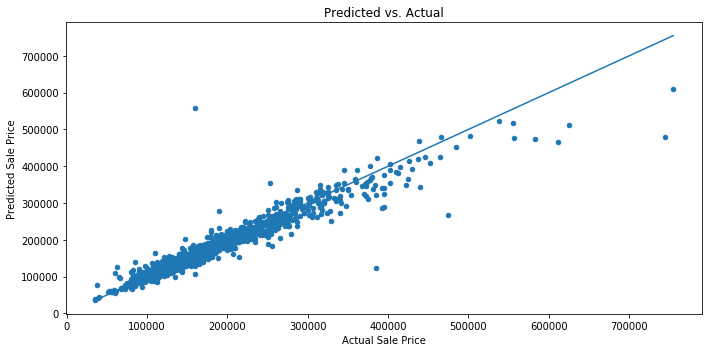

In [11]:
pred_train = np.exp(sess.run(k, feed_dict={x1: x_train, keep_prob : 1}))

plt.figure(figsize=(10, 5))
plt.scatter(y_train, pred_train, s=20)
plt.title('Predicted vs. Actual')
plt.xlabel('Actual Sale Price')
plt.ylabel('Predicted Sale Price')

plt.plot([min(y_train), max(y_train)], [min(y_train), max(y_train)])
plt.tight_layout()

sess.close()
print(rmsle(y_train,pred_train))

### train 전체 데이터로 학습, test로 predict

In [12]:
print ("Training\n")
sess = tf.Session()
init = tf.global_variables_initializer() #.run()
sess.run(init)

###
batch_size = x_train.shape[0]

# tensorboard를 사용하기 위하여 summary.scalar를 사용
tf.summary.scalar('loss', cost)
merged = tf.summary.merge_all()
train_writer = tf.summary.FileWriter('./tensorboard', sess.graph)

# (?, ) -> (?, 1)
y_train_log = y_train_log.reshape([y_train_log.shape[0], 1])

j=0

for _ in range(step):
    j += 1
    
    batch_count = int(math.ceil(x_train.shape[0]/batch_size))
    for i in range(batch_count):
        batch_xs, batch_ys = x_train[batch_size * i : batch_size*(i+1)], y_train_log[batch_size * i : batch_size*(i+1)]
        sess.run(train_step,
                            feed_dict={x1: batch_xs, y_: batch_ys, keep_prob:keepout, lr : learning_rate})
        summary = sess.run(merged,
                            feed_dict={x1:  x_train, y_: y_train_log, keep_prob:keepout, lr : learning_rate})
        train_writer.add_summary(summary, j)
        if i % 300 == 0:
            print('step : {}, batch : {}'.format(j, i), end='\t')
            print ('loss :',sess.run(cost, feed_dict={x1: x_train, y_: y_train_log, keep_prob:keepout, lr : learning_rate}))


print ("Testing model")
# Test trained model
y_test = pd.read_csv('./data/submission.csv', engine='python')
hidden1_pred = np.exp(sess.run(k, feed_dict={x1: x_test, keep_prob : 1}))

submission = pd.DataFrame()
submission['Id'] = x_test.index+1461
submission['SalePrice'] = (hidden1_pred)
print(submission)
submission.to_csv('./output_csv/MLP_tensorflow_all_normalize_skewed.csv', index=False)

train_writer.close()
sess.close()

Training

step : 1, batch : 0	loss : 113.32352
step : 2, batch : 0	loss : 92.49494
step : 3, batch : 0	loss : 73.54688
step : 4, batch : 0	loss : 56.771152
step : 5, batch : 0	loss : 41.247074
step : 6, batch : 0	loss : 27.994453
step : 7, batch : 0	loss : 16.82437
step : 8, batch : 0	loss : 9.20107
step : 9, batch : 0	loss : 4.3300743
step : 10, batch : 0	loss : 3.415528
step : 11, batch : 0	loss : 5.283776
step : 12, batch : 0	loss : 9.761163
step : 13, batch : 0	loss : 13.7480345
step : 14, batch : 0	loss : 15.085261
step : 15, batch : 0	loss : 15.755171
step : 16, batch : 0	loss : 14.473624
step : 17, batch : 0	loss : 12.099148
step : 18, batch : 0	loss : 9.094577
step : 19, batch : 0	loss : 6.903661
step : 20, batch : 0	loss : 4.607761
step : 21, batch : 0	loss : 3.6839378
step : 22, batch : 0	loss : 3.273024
step : 23, batch : 0	loss : 3.2849705
step : 24, batch : 0	loss : 3.52662
step : 25, batch : 0	loss : 4.3802223
step : 26, batch : 0	loss : 5.3146176
step : 27, batch : 0	los

step : 218, batch : 0	loss : 1.8210512
step : 219, batch : 0	loss : 1.8366723
step : 220, batch : 0	loss : 1.9179846
step : 221, batch : 0	loss : 1.8360661
step : 222, batch : 0	loss : 1.7487351
step : 223, batch : 0	loss : 1.8416713
step : 224, batch : 0	loss : 1.744012
step : 225, batch : 0	loss : 1.7689704
step : 226, batch : 0	loss : 1.8391469
step : 227, batch : 0	loss : 1.7492868
step : 228, batch : 0	loss : 1.8671001
step : 229, batch : 0	loss : 1.7118714
step : 230, batch : 0	loss : 1.7377628
step : 231, batch : 0	loss : 1.747666
step : 232, batch : 0	loss : 1.7112
step : 233, batch : 0	loss : 1.7072492
step : 234, batch : 0	loss : 1.7296141
step : 235, batch : 0	loss : 1.7937725
step : 236, batch : 0	loss : 1.783992
step : 237, batch : 0	loss : 1.6643435
step : 238, batch : 0	loss : 1.8066484
step : 239, batch : 0	loss : 1.8515135
step : 240, batch : 0	loss : 1.6934576
step : 241, batch : 0	loss : 1.6517509
step : 242, batch : 0	loss : 1.7134937
step : 243, batch : 0	loss : 1.

step : 429, batch : 0	loss : 1.5272168
step : 430, batch : 0	loss : 1.4609509
step : 431, batch : 0	loss : 1.4565976
step : 432, batch : 0	loss : 1.4954348
step : 433, batch : 0	loss : 1.4830742
step : 434, batch : 0	loss : 1.4358714
step : 435, batch : 0	loss : 1.3435383
step : 436, batch : 0	loss : 1.4101937
step : 437, batch : 0	loss : 1.4895916
step : 438, batch : 0	loss : 1.5141319
step : 439, batch : 0	loss : 1.4340779
step : 440, batch : 0	loss : 1.5844666
step : 441, batch : 0	loss : 1.4870327
step : 442, batch : 0	loss : 1.4368017
step : 443, batch : 0	loss : 1.37292
step : 444, batch : 0	loss : 1.4802669
step : 445, batch : 0	loss : 1.4826307
step : 446, batch : 0	loss : 1.4266161
step : 447, batch : 0	loss : 1.4527966
step : 448, batch : 0	loss : 1.4700096
step : 449, batch : 0	loss : 1.4131393
step : 450, batch : 0	loss : 1.3264617
step : 451, batch : 0	loss : 1.4681269
step : 452, batch : 0	loss : 1.4091005
step : 453, batch : 0	loss : 1.3899773
step : 454, batch : 0	loss 

step : 647, batch : 0	loss : 1.2808738
step : 648, batch : 0	loss : 1.3054368
step : 649, batch : 0	loss : 1.2895175
step : 650, batch : 0	loss : 1.4300926
step : 651, batch : 0	loss : 1.3071145
step : 652, batch : 0	loss : 1.2862698
step : 653, batch : 0	loss : 1.3064574
step : 654, batch : 0	loss : 1.4010581
step : 655, batch : 0	loss : 1.3576261
step : 656, batch : 0	loss : 1.2667851
step : 657, batch : 0	loss : 1.3043231
step : 658, batch : 0	loss : 1.2244204
step : 659, batch : 0	loss : 1.3343194
step : 660, batch : 0	loss : 1.2859119
step : 661, batch : 0	loss : 1.3182559
step : 662, batch : 0	loss : 1.4409668
step : 663, batch : 0	loss : 1.3334802
step : 664, batch : 0	loss : 1.3421136
step : 665, batch : 0	loss : 1.3506576
step : 666, batch : 0	loss : 1.3006831
step : 667, batch : 0	loss : 1.3829112
step : 668, batch : 0	loss : 1.3484832
step : 669, batch : 0	loss : 1.3417658
step : 670, batch : 0	loss : 1.3150344
step : 671, batch : 0	loss : 1.3443683
step : 672, batch : 0	los

step : 863, batch : 0	loss : 1.2518086
step : 864, batch : 0	loss : 1.3179504
step : 865, batch : 0	loss : 1.4043478
step : 866, batch : 0	loss : 1.2519114
step : 867, batch : 0	loss : 1.313791
step : 868, batch : 0	loss : 1.274064
step : 869, batch : 0	loss : 1.2468317
step : 870, batch : 0	loss : 1.295039
step : 871, batch : 0	loss : 1.2894726
step : 872, batch : 0	loss : 1.2730818
step : 873, batch : 0	loss : 1.2461152
step : 874, batch : 0	loss : 1.2329798
step : 875, batch : 0	loss : 1.2941964
step : 876, batch : 0	loss : 1.210394
step : 877, batch : 0	loss : 1.2339303
step : 878, batch : 0	loss : 1.2039251
step : 879, batch : 0	loss : 1.2605796
step : 880, batch : 0	loss : 1.2583473
step : 881, batch : 0	loss : 1.2642293
step : 882, batch : 0	loss : 1.2330357
step : 883, batch : 0	loss : 1.2727718
step : 884, batch : 0	loss : 1.2558694
step : 885, batch : 0	loss : 1.18069
step : 886, batch : 0	loss : 1.1916189
step : 887, batch : 0	loss : 1.242791
step : 888, batch : 0	loss : 1.2

step : 1075, batch : 0	loss : 1.2763803
step : 1076, batch : 0	loss : 1.2447758
step : 1077, batch : 0	loss : 1.2084011
step : 1078, batch : 0	loss : 1.1805409
step : 1079, batch : 0	loss : 1.2596861
step : 1080, batch : 0	loss : 1.2798519
step : 1081, batch : 0	loss : 1.1685708
step : 1082, batch : 0	loss : 1.1988611
step : 1083, batch : 0	loss : 1.1871986
step : 1084, batch : 0	loss : 1.1837103
step : 1085, batch : 0	loss : 1.2510856
step : 1086, batch : 0	loss : 1.1927698
step : 1087, batch : 0	loss : 1.1888024
step : 1088, batch : 0	loss : 1.1917155
step : 1089, batch : 0	loss : 1.2030066
step : 1090, batch : 0	loss : 1.1925769
step : 1091, batch : 0	loss : 1.2151941
step : 1092, batch : 0	loss : 1.2266536
step : 1093, batch : 0	loss : 1.2329319
step : 1094, batch : 0	loss : 1.2035301
step : 1095, batch : 0	loss : 1.2384613
step : 1096, batch : 0	loss : 1.1946418
step : 1097, batch : 0	loss : 1.1577922
step : 1098, batch : 0	loss : 1.1535418
step : 1099, batch : 0	loss : 1.1819423


step : 1285, batch : 0	loss : 1.1017321
step : 1286, batch : 0	loss : 1.2122755
step : 1287, batch : 0	loss : 1.135946
step : 1288, batch : 0	loss : 1.1888177
step : 1289, batch : 0	loss : 1.150843
step : 1290, batch : 0	loss : 1.1910008
step : 1291, batch : 0	loss : 1.190311
step : 1292, batch : 0	loss : 1.1708921
step : 1293, batch : 0	loss : 1.1540797
step : 1294, batch : 0	loss : 1.1766088
step : 1295, batch : 0	loss : 1.1088136
step : 1296, batch : 0	loss : 1.2066498
step : 1297, batch : 0	loss : 1.2004075
step : 1298, batch : 0	loss : 1.1988539
step : 1299, batch : 0	loss : 1.1733286
step : 1300, batch : 0	loss : 1.1732899
step : 1301, batch : 0	loss : 1.161953
step : 1302, batch : 0	loss : 1.1812248
step : 1303, batch : 0	loss : 1.1271716
step : 1304, batch : 0	loss : 1.2088859
step : 1305, batch : 0	loss : 1.1960267
step : 1306, batch : 0	loss : 1.1577787
step : 1307, batch : 0	loss : 1.2245412
step : 1308, batch : 0	loss : 1.1682898
step : 1309, batch : 0	loss : 1.2372062
step

step : 1497, batch : 0	loss : 1.1456236
step : 1498, batch : 0	loss : 1.1803256
step : 1499, batch : 0	loss : 1.0799963
step : 1500, batch : 0	loss : 1.1945482
step : 1501, batch : 0	loss : 1.1951497
step : 1502, batch : 0	loss : 1.1281636
step : 1503, batch : 0	loss : 1.1696332
step : 1504, batch : 0	loss : 1.0861149
step : 1505, batch : 0	loss : 1.1510074
step : 1506, batch : 0	loss : 1.0708326
step : 1507, batch : 0	loss : 1.1551359
step : 1508, batch : 0	loss : 1.0809482
step : 1509, batch : 0	loss : 1.1540635
step : 1510, batch : 0	loss : 1.0925496
step : 1511, batch : 0	loss : 1.2010261
step : 1512, batch : 0	loss : 1.1354886
step : 1513, batch : 0	loss : 1.1538653
step : 1514, batch : 0	loss : 1.1476581
step : 1515, batch : 0	loss : 1.0875126
step : 1516, batch : 0	loss : 1.015732
step : 1517, batch : 0	loss : 1.2135918
step : 1518, batch : 0	loss : 1.1546935
step : 1519, batch : 0	loss : 1.1552372
step : 1520, batch : 0	loss : 1.1524189
step : 1521, batch : 0	loss : 1.1652033
s

step : 1709, batch : 0	loss : 1.0433376
step : 1710, batch : 0	loss : 1.0588264
step : 1711, batch : 0	loss : 1.091859
step : 1712, batch : 0	loss : 1.1274564
step : 1713, batch : 0	loss : 1.0544494
step : 1714, batch : 0	loss : 1.0611919
step : 1715, batch : 0	loss : 1.1309499
step : 1716, batch : 0	loss : 1.0412235
step : 1717, batch : 0	loss : 1.0860591
step : 1718, batch : 0	loss : 1.0396632
step : 1719, batch : 0	loss : 1.1137301
step : 1720, batch : 0	loss : 1.0798473
step : 1721, batch : 0	loss : 1.0688293
step : 1722, batch : 0	loss : 1.134136
step : 1723, batch : 0	loss : 1.105784
step : 1724, batch : 0	loss : 1.1016754
step : 1725, batch : 0	loss : 1.1496075
step : 1726, batch : 0	loss : 1.1097851
step : 1727, batch : 0	loss : 1.0656416
step : 1728, batch : 0	loss : 1.0407953
step : 1729, batch : 0	loss : 1.1118535
step : 1730, batch : 0	loss : 0.97580665
step : 1731, batch : 0	loss : 1.0867844
step : 1732, batch : 0	loss : 1.048279
step : 1733, batch : 0	loss : 1.0597129
ste

step : 1919, batch : 0	loss : 1.0967696
step : 1920, batch : 0	loss : 1.051261
step : 1921, batch : 0	loss : 1.0645217
step : 1922, batch : 0	loss : 1.0781455
step : 1923, batch : 0	loss : 1.1013374
step : 1924, batch : 0	loss : 1.012101
step : 1925, batch : 0	loss : 1.0100691
step : 1926, batch : 0	loss : 1.0394363
step : 1927, batch : 0	loss : 1.0295992
step : 1928, batch : 0	loss : 1.0076627
step : 1929, batch : 0	loss : 1.1289159
step : 1930, batch : 0	loss : 1.0051641
step : 1931, batch : 0	loss : 1.1061841
step : 1932, batch : 0	loss : 1.0781353
step : 1933, batch : 0	loss : 1.046347
step : 1934, batch : 0	loss : 1.0540287
step : 1935, batch : 0	loss : 1.0237346
step : 1936, batch : 0	loss : 1.1261052
step : 1937, batch : 0	loss : 1.0231882
step : 1938, batch : 0	loss : 1.013108
step : 1939, batch : 0	loss : 1.0520812
step : 1940, batch : 0	loss : 0.98367774
step : 1941, batch : 0	loss : 1.032105
step : 1942, batch : 0	loss : 1.1027893
step : 1943, batch : 0	loss : 1.0407517
step

step : 2130, batch : 0	loss : 0.9975119
step : 2131, batch : 0	loss : 1.0549803
step : 2132, batch : 0	loss : 0.9945475
step : 2133, batch : 0	loss : 1.0174017
step : 2134, batch : 0	loss : 1.0922185
step : 2135, batch : 0	loss : 1.0178119
step : 2136, batch : 0	loss : 0.9891554
step : 2137, batch : 0	loss : 1.0101805
step : 2138, batch : 0	loss : 0.97215825
step : 2139, batch : 0	loss : 1.0357113
step : 2140, batch : 0	loss : 0.951238
step : 2141, batch : 0	loss : 1.030947
step : 2142, batch : 0	loss : 1.00145
step : 2143, batch : 0	loss : 0.976845
step : 2144, batch : 0	loss : 1.0298445
step : 2145, batch : 0	loss : 1.0091655
step : 2146, batch : 0	loss : 0.9870675
step : 2147, batch : 0	loss : 1.0076516
step : 2148, batch : 0	loss : 0.9991811
step : 2149, batch : 0	loss : 0.9957601
step : 2150, batch : 0	loss : 1.0172261
step : 2151, batch : 0	loss : 1.0049231
step : 2152, batch : 0	loss : 0.93927073
step : 2153, batch : 0	loss : 1.011372
step : 2154, batch : 0	loss : 0.96728617
ste

step : 2341, batch : 0	loss : 0.99100673
step : 2342, batch : 0	loss : 1.0261376
step : 2343, batch : 0	loss : 0.92843175
step : 2344, batch : 0	loss : 0.9764816
step : 2345, batch : 0	loss : 1.0149511
step : 2346, batch : 0	loss : 0.94966245
step : 2347, batch : 0	loss : 0.98085153
step : 2348, batch : 0	loss : 0.96215224
step : 2349, batch : 0	loss : 0.92093146
step : 2350, batch : 0	loss : 0.9202232
step : 2351, batch : 0	loss : 1.0153828
step : 2352, batch : 0	loss : 0.95233345
step : 2353, batch : 0	loss : 0.95173454
step : 2354, batch : 0	loss : 0.9722666
step : 2355, batch : 0	loss : 0.96715003
step : 2356, batch : 0	loss : 0.9879165
step : 2357, batch : 0	loss : 1.0676082
step : 2358, batch : 0	loss : 0.9863874
step : 2359, batch : 0	loss : 0.95620024
step : 2360, batch : 0	loss : 1.0124581
step : 2361, batch : 0	loss : 0.9787521
step : 2362, batch : 0	loss : 0.958801
step : 2363, batch : 0	loss : 0.97811073
step : 2364, batch : 0	loss : 0.9923965
step : 2365, batch : 0	loss : 

step : 2549, batch : 0	loss : 0.8973923
step : 2550, batch : 0	loss : 0.9537125
step : 2551, batch : 0	loss : 0.9632134
step : 2552, batch : 0	loss : 1.0030401
step : 2553, batch : 0	loss : 0.8837803
step : 2554, batch : 0	loss : 0.8834338
step : 2555, batch : 0	loss : 0.953264
step : 2556, batch : 0	loss : 0.9065323
step : 2557, batch : 0	loss : 0.90762234
step : 2558, batch : 0	loss : 0.8883471
step : 2559, batch : 0	loss : 0.9365693
step : 2560, batch : 0	loss : 0.9821729
step : 2561, batch : 0	loss : 0.9213094
step : 2562, batch : 0	loss : 0.8539202
step : 2563, batch : 0	loss : 0.94939923
step : 2564, batch : 0	loss : 0.8917612
step : 2565, batch : 0	loss : 0.98825747
step : 2566, batch : 0	loss : 0.97061384
step : 2567, batch : 0	loss : 0.9501992
step : 2568, batch : 0	loss : 0.9751781
step : 2569, batch : 0	loss : 0.93432933
step : 2570, batch : 0	loss : 0.8774849
step : 2571, batch : 0	loss : 0.8943914
step : 2572, batch : 0	loss : 1.0604218
step : 2573, batch : 0	loss : 0.9361

step : 2755, batch : 0	loss : 0.9048208
step : 2756, batch : 0	loss : 0.95720154
step : 2757, batch : 0	loss : 0.9187372
step : 2758, batch : 0	loss : 0.9133694
step : 2759, batch : 0	loss : 0.8620373
step : 2760, batch : 0	loss : 0.85897416
step : 2761, batch : 0	loss : 0.90968555
step : 2762, batch : 0	loss : 0.89162284
step : 2763, batch : 0	loss : 0.87468463
step : 2764, batch : 0	loss : 0.8980315
step : 2765, batch : 0	loss : 0.8998365
step : 2766, batch : 0	loss : 0.8715514
step : 2767, batch : 0	loss : 0.87037
step : 2768, batch : 0	loss : 0.910648
step : 2769, batch : 0	loss : 0.8953064
step : 2770, batch : 0	loss : 0.8481415
step : 2771, batch : 0	loss : 0.917382
step : 2772, batch : 0	loss : 0.8802886
step : 2773, batch : 0	loss : 0.8710384
step : 2774, batch : 0	loss : 0.89755315
step : 2775, batch : 0	loss : 0.97115386
step : 2776, batch : 0	loss : 0.86173433
step : 2777, batch : 0	loss : 0.90934986
step : 2778, batch : 0	loss : 0.9097772
step : 2779, batch : 0	loss : 0.905

step : 2961, batch : 0	loss : 0.8582146
step : 2962, batch : 0	loss : 0.8395536
step : 2963, batch : 0	loss : 0.8596977
step : 2964, batch : 0	loss : 0.9305495
step : 2965, batch : 0	loss : 0.81026936
step : 2966, batch : 0	loss : 0.8395474
step : 2967, batch : 0	loss : 0.8974822
step : 2968, batch : 0	loss : 0.8702992
step : 2969, batch : 0	loss : 0.8389134
step : 2970, batch : 0	loss : 0.81517786
step : 2971, batch : 0	loss : 0.8403932
step : 2972, batch : 0	loss : 0.87458515
step : 2973, batch : 0	loss : 0.87541354
step : 2974, batch : 0	loss : 0.8316723
step : 2975, batch : 0	loss : 0.8946243
step : 2976, batch : 0	loss : 0.8669148
step : 2977, batch : 0	loss : 0.83443725
step : 2978, batch : 0	loss : 0.81197613
step : 2979, batch : 0	loss : 0.86315423
step : 2980, batch : 0	loss : 0.9075219
step : 2981, batch : 0	loss : 0.830261
step : 2982, batch : 0	loss : 0.9193393
step : 2983, batch : 0	loss : 0.8537709
step : 2984, batch : 0	loss : 0.90986633
step : 2985, batch : 0	loss : 0.8

step : 3172, batch : 0	loss : 0.7948605
step : 3173, batch : 0	loss : 0.8081733
step : 3174, batch : 0	loss : 0.83492154
step : 3175, batch : 0	loss : 0.7954119
step : 3176, batch : 0	loss : 0.83107996
step : 3177, batch : 0	loss : 0.81865454
step : 3178, batch : 0	loss : 0.84155416
step : 3179, batch : 0	loss : 0.8264807
step : 3180, batch : 0	loss : 0.8037709
step : 3181, batch : 0	loss : 0.8116706
step : 3182, batch : 0	loss : 0.8260431
step : 3183, batch : 0	loss : 0.7979168
step : 3184, batch : 0	loss : 0.8149061
step : 3185, batch : 0	loss : 0.80618006
step : 3186, batch : 0	loss : 0.8042372
step : 3187, batch : 0	loss : 0.7774502
step : 3188, batch : 0	loss : 0.8168203
step : 3189, batch : 0	loss : 0.8072171
step : 3190, batch : 0	loss : 0.79813695
step : 3191, batch : 0	loss : 0.8083946
step : 3192, batch : 0	loss : 0.807178
step : 3193, batch : 0	loss : 0.82109225
step : 3194, batch : 0	loss : 0.8363999
step : 3195, batch : 0	loss : 0.8473848
step : 3196, batch : 0	loss : 0.82

step : 3377, batch : 0	loss : 0.769421
step : 3378, batch : 0	loss : 0.7175906
step : 3379, batch : 0	loss : 0.8163589
step : 3380, batch : 0	loss : 0.7637317
step : 3381, batch : 0	loss : 0.7922596
step : 3382, batch : 0	loss : 0.7165309
step : 3383, batch : 0	loss : 0.80402994
step : 3384, batch : 0	loss : 0.76381904
step : 3385, batch : 0	loss : 0.7923311
step : 3386, batch : 0	loss : 0.81177646
step : 3387, batch : 0	loss : 0.74688506
step : 3388, batch : 0	loss : 0.7400129
step : 3389, batch : 0	loss : 0.79675454
step : 3390, batch : 0	loss : 0.7904531
step : 3391, batch : 0	loss : 0.7436683
step : 3392, batch : 0	loss : 0.7809001
step : 3393, batch : 0	loss : 0.728276
step : 3394, batch : 0	loss : 0.80216277
step : 3395, batch : 0	loss : 0.7973086
step : 3396, batch : 0	loss : 0.74521506
step : 3397, batch : 0	loss : 0.8364761
step : 3398, batch : 0	loss : 0.74604213
step : 3399, batch : 0	loss : 0.82045734
step : 3400, batch : 0	loss : 0.8219541
step : 3401, batch : 0	loss : 0.7

step : 3581, batch : 0	loss : 0.7494241
step : 3582, batch : 0	loss : 0.6827786
step : 3583, batch : 0	loss : 0.7182228
step : 3584, batch : 0	loss : 0.7071889
step : 3585, batch : 0	loss : 0.70365673
step : 3586, batch : 0	loss : 0.7605213
step : 3587, batch : 0	loss : 0.7205351
step : 3588, batch : 0	loss : 0.7256092
step : 3589, batch : 0	loss : 0.69480944
step : 3590, batch : 0	loss : 0.765967
step : 3591, batch : 0	loss : 0.7446393
step : 3592, batch : 0	loss : 0.7181045
step : 3593, batch : 0	loss : 0.74904275
step : 3594, batch : 0	loss : 0.75550276
step : 3595, batch : 0	loss : 0.7508391
step : 3596, batch : 0	loss : 0.7002777
step : 3597, batch : 0	loss : 0.73081404
step : 3598, batch : 0	loss : 0.7560567
step : 3599, batch : 0	loss : 0.72598517
step : 3600, batch : 0	loss : 0.7338504
step : 3601, batch : 0	loss : 0.7181251
step : 3602, batch : 0	loss : 0.71690553
step : 3603, batch : 0	loss : 0.7109153
step : 3604, batch : 0	loss : 0.6716083
step : 3605, batch : 0	loss : 0.66

step : 3786, batch : 0	loss : 0.7387236
step : 3787, batch : 0	loss : 0.66089606
step : 3788, batch : 0	loss : 0.6907477
step : 3789, batch : 0	loss : 0.7156649
step : 3790, batch : 0	loss : 0.69263154
step : 3791, batch : 0	loss : 0.6641849
step : 3792, batch : 0	loss : 0.70408845
step : 3793, batch : 0	loss : 0.6698763
step : 3794, batch : 0	loss : 0.6583372
step : 3795, batch : 0	loss : 0.6622032
step : 3796, batch : 0	loss : 0.66790396
step : 3797, batch : 0	loss : 0.6732867
step : 3798, batch : 0	loss : 0.6730572
step : 3799, batch : 0	loss : 0.66656464
step : 3800, batch : 0	loss : 0.7388902
step : 3801, batch : 0	loss : 0.68407923
step : 3802, batch : 0	loss : 0.6804603
step : 3803, batch : 0	loss : 0.6512582
step : 3804, batch : 0	loss : 0.65026665
step : 3805, batch : 0	loss : 0.7081701
step : 3806, batch : 0	loss : 0.7608729
step : 3807, batch : 0	loss : 0.6833857
step : 3808, batch : 0	loss : 0.6887349
step : 3809, batch : 0	loss : 0.6701821
step : 3810, batch : 0	loss : 0.7

step : 3989, batch : 0	loss : 0.67027855
step : 3990, batch : 0	loss : 0.68481165
step : 3991, batch : 0	loss : 0.6540178
step : 3992, batch : 0	loss : 0.68774444
step : 3993, batch : 0	loss : 0.65188354
step : 3994, batch : 0	loss : 0.6233628
step : 3995, batch : 0	loss : 0.5864077
step : 3996, batch : 0	loss : 0.63780206
step : 3997, batch : 0	loss : 0.6243968
step : 3998, batch : 0	loss : 0.65527403
step : 3999, batch : 0	loss : 0.6167527
step : 4000, batch : 0	loss : 0.63055116
step : 4001, batch : 0	loss : 0.65787596
step : 4002, batch : 0	loss : 0.67283475
step : 4003, batch : 0	loss : 0.62503946
step : 4004, batch : 0	loss : 0.57482284
step : 4005, batch : 0	loss : 0.64539915
step : 4006, batch : 0	loss : 0.6421054
step : 4007, batch : 0	loss : 0.6398934
step : 4008, batch : 0	loss : 0.6810043
step : 4009, batch : 0	loss : 0.6535349
step : 4010, batch : 0	loss : 0.63709867
step : 4011, batch : 0	loss : 0.57140064
step : 4012, batch : 0	loss : 0.6737089
step : 4013, batch : 0	los

step : 4197, batch : 0	loss : 0.65575296
step : 4198, batch : 0	loss : 0.6094608
step : 4199, batch : 0	loss : 0.6312489
step : 4200, batch : 0	loss : 0.5772817
step : 4201, batch : 0	loss : 0.62002856
step : 4202, batch : 0	loss : 0.58769715
step : 4203, batch : 0	loss : 0.63460606
step : 4204, batch : 0	loss : 0.63112587
step : 4205, batch : 0	loss : 0.57588464
step : 4206, batch : 0	loss : 0.6033191
step : 4207, batch : 0	loss : 0.60176975
step : 4208, batch : 0	loss : 0.5724126
step : 4209, batch : 0	loss : 0.62071824
step : 4210, batch : 0	loss : 0.6146398
step : 4211, batch : 0	loss : 0.6088101
step : 4212, batch : 0	loss : 0.57265997
step : 4213, batch : 0	loss : 0.64179474
step : 4214, batch : 0	loss : 0.6110063
step : 4215, batch : 0	loss : 0.57378757
step : 4216, batch : 0	loss : 0.60495496
step : 4217, batch : 0	loss : 0.59873277
step : 4218, batch : 0	loss : 0.5972772
step : 4219, batch : 0	loss : 0.62812126
step : 4220, batch : 0	loss : 0.5680355
step : 4221, batch : 0	los

step : 4405, batch : 0	loss : 0.5500951
step : 4406, batch : 0	loss : 0.5505649
step : 4407, batch : 0	loss : 0.5830532
step : 4408, batch : 0	loss : 0.57559377
step : 4409, batch : 0	loss : 0.56722224
step : 4410, batch : 0	loss : 0.54969925
step : 4411, batch : 0	loss : 0.57347906
step : 4412, batch : 0	loss : 0.57458055
step : 4413, batch : 0	loss : 0.5430544
step : 4414, batch : 0	loss : 0.5660527
step : 4415, batch : 0	loss : 0.54645497
step : 4416, batch : 0	loss : 0.5788857
step : 4417, batch : 0	loss : 0.5897445
step : 4418, batch : 0	loss : 0.5822301
step : 4419, batch : 0	loss : 0.55470145
step : 4420, batch : 0	loss : 0.578144
step : 4421, batch : 0	loss : 0.54204637
step : 4422, batch : 0	loss : 0.54699546
step : 4423, batch : 0	loss : 0.5202875
step : 4424, batch : 0	loss : 0.56548685
step : 4425, batch : 0	loss : 0.5531397
step : 4426, batch : 0	loss : 0.55518526
step : 4427, batch : 0	loss : 0.5687523
step : 4428, batch : 0	loss : 0.5252781
step : 4429, batch : 0	loss : 

step : 4611, batch : 0	loss : 0.5305096
step : 4612, batch : 0	loss : 0.5457819
step : 4613, batch : 0	loss : 0.54568344
step : 4614, batch : 0	loss : 0.5172833
step : 4615, batch : 0	loss : 0.52199787
step : 4616, batch : 0	loss : 0.4960599
step : 4617, batch : 0	loss : 0.5428711
step : 4618, batch : 0	loss : 0.50591
step : 4619, batch : 0	loss : 0.5343826
step : 4620, batch : 0	loss : 0.5231807
step : 4621, batch : 0	loss : 0.5010018
step : 4622, batch : 0	loss : 0.5655192
step : 4623, batch : 0	loss : 0.5241673
step : 4624, batch : 0	loss : 0.528664
step : 4625, batch : 0	loss : 0.555169
step : 4626, batch : 0	loss : 0.5210631
step : 4627, batch : 0	loss : 0.53999823
step : 4628, batch : 0	loss : 0.50575435
step : 4629, batch : 0	loss : 0.53286946
step : 4630, batch : 0	loss : 0.5137086
step : 4631, batch : 0	loss : 0.5024696
step : 4632, batch : 0	loss : 0.4905201
step : 4633, batch : 0	loss : 0.5137289
step : 4634, batch : 0	loss : 0.52847844
step : 4635, batch : 0	loss : 0.505597

step : 4823, batch : 0	loss : 0.5212689
step : 4824, batch : 0	loss : 0.45304945
step : 4825, batch : 0	loss : 0.49742606
step : 4826, batch : 0	loss : 0.49897203
step : 4827, batch : 0	loss : 0.5107137
step : 4828, batch : 0	loss : 0.5115494
step : 4829, batch : 0	loss : 0.4861841
step : 4830, batch : 0	loss : 0.4882307
step : 4831, batch : 0	loss : 0.4659213
step : 4832, batch : 0	loss : 0.48306438
step : 4833, batch : 0	loss : 0.48782843
step : 4834, batch : 0	loss : 0.4733375
step : 4835, batch : 0	loss : 0.48315266
step : 4836, batch : 0	loss : 0.45711392
step : 4837, batch : 0	loss : 0.46727452
step : 4838, batch : 0	loss : 0.46727088
step : 4839, batch : 0	loss : 0.50096285
step : 4840, batch : 0	loss : 0.47273946
step : 4841, batch : 0	loss : 0.49489442
step : 4842, batch : 0	loss : 0.48114884
step : 4843, batch : 0	loss : 0.4707112
step : 4844, batch : 0	loss : 0.5055456
step : 4845, batch : 0	loss : 0.48902613
step : 4846, batch : 0	loss : 0.5082638
step : 4847, batch : 0	los

step : 5028, batch : 0	loss : 0.43536368
step : 5029, batch : 0	loss : 0.470588
step : 5030, batch : 0	loss : 0.41756862
step : 5031, batch : 0	loss : 0.44899493
step : 5032, batch : 0	loss : 0.41229984
step : 5033, batch : 0	loss : 0.4162915
step : 5034, batch : 0	loss : 0.42813104
step : 5035, batch : 0	loss : 0.43987322
step : 5036, batch : 0	loss : 0.48339108
step : 5037, batch : 0	loss : 0.42739338
step : 5038, batch : 0	loss : 0.4439552
step : 5039, batch : 0	loss : 0.42367676
step : 5040, batch : 0	loss : 0.43591627
step : 5041, batch : 0	loss : 0.45167732
step : 5042, batch : 0	loss : 0.44864708
step : 5043, batch : 0	loss : 0.4265008
step : 5044, batch : 0	loss : 0.45242104
step : 5045, batch : 0	loss : 0.43840992
step : 5046, batch : 0	loss : 0.44171202
step : 5047, batch : 0	loss : 0.45155862
step : 5048, batch : 0	loss : 0.4482717
step : 5049, batch : 0	loss : 0.4164888
step : 5050, batch : 0	loss : 0.45473567
step : 5051, batch : 0	loss : 0.4247714
step : 5052, batch : 0	l

step : 5230, batch : 0	loss : 0.38313812
step : 5231, batch : 0	loss : 0.36388382
step : 5232, batch : 0	loss : 0.39712572
step : 5233, batch : 0	loss : 0.40057084
step : 5234, batch : 0	loss : 0.3974769
step : 5235, batch : 0	loss : 0.41294634
step : 5236, batch : 0	loss : 0.40716967
step : 5237, batch : 0	loss : 0.39872155
step : 5238, batch : 0	loss : 0.39227557
step : 5239, batch : 0	loss : 0.4097857
step : 5240, batch : 0	loss : 0.41238904
step : 5241, batch : 0	loss : 0.38398007
step : 5242, batch : 0	loss : 0.43281865
step : 5243, batch : 0	loss : 0.39880547
step : 5244, batch : 0	loss : 0.41039887
step : 5245, batch : 0	loss : 0.3987951
step : 5246, batch : 0	loss : 0.39884114
step : 5247, batch : 0	loss : 0.41359755
step : 5248, batch : 0	loss : 0.38458323
step : 5249, batch : 0	loss : 0.4070169
step : 5250, batch : 0	loss : 0.3945587
step : 5251, batch : 0	loss : 0.40548328
step : 5252, batch : 0	loss : 0.4386689
step : 5253, batch : 0	loss : 0.41922534
step : 5254, batch : 0

step : 5433, batch : 0	loss : 0.41453806
step : 5434, batch : 0	loss : 0.363781
step : 5435, batch : 0	loss : 0.3814109
step : 5436, batch : 0	loss : 0.3713135
step : 5437, batch : 0	loss : 0.37692502
step : 5438, batch : 0	loss : 0.3676709
step : 5439, batch : 0	loss : 0.3646943
step : 5440, batch : 0	loss : 0.3980423
step : 5441, batch : 0	loss : 0.3829031
step : 5442, batch : 0	loss : 0.3787241
step : 5443, batch : 0	loss : 0.379722
step : 5444, batch : 0	loss : 0.37521794
step : 5445, batch : 0	loss : 0.38302878
step : 5446, batch : 0	loss : 0.3531573
step : 5447, batch : 0	loss : 0.3808838
step : 5448, batch : 0	loss : 0.3947505
step : 5449, batch : 0	loss : 0.3682632
step : 5450, batch : 0	loss : 0.37242004
step : 5451, batch : 0	loss : 0.3531434
step : 5452, batch : 0	loss : 0.37965444
step : 5453, batch : 0	loss : 0.35013327
step : 5454, batch : 0	loss : 0.35898215
step : 5455, batch : 0	loss : 0.38151035
step : 5456, batch : 0	loss : 0.3822149
step : 5457, batch : 0	loss : 0.3

step : 5636, batch : 0	loss : 0.34652936
step : 5637, batch : 0	loss : 0.3374265
step : 5638, batch : 0	loss : 0.34311762
step : 5639, batch : 0	loss : 0.3570548
step : 5640, batch : 0	loss : 0.36160773
step : 5641, batch : 0	loss : 0.342482
step : 5642, batch : 0	loss : 0.3293005
step : 5643, batch : 0	loss : 0.3426113
step : 5644, batch : 0	loss : 0.34235868
step : 5645, batch : 0	loss : 0.36831895
step : 5646, batch : 0	loss : 0.35918194
step : 5647, batch : 0	loss : 0.33903348
step : 5648, batch : 0	loss : 0.31997404
step : 5649, batch : 0	loss : 0.35154274
step : 5650, batch : 0	loss : 0.34312713
step : 5651, batch : 0	loss : 0.33648476
step : 5652, batch : 0	loss : 0.35079038
step : 5653, batch : 0	loss : 0.3343336
step : 5654, batch : 0	loss : 0.3280659
step : 5655, batch : 0	loss : 0.3341692
step : 5656, batch : 0	loss : 0.34697682
step : 5657, batch : 0	loss : 0.3384421
step : 5658, batch : 0	loss : 0.3466236
step : 5659, batch : 0	loss : 0.33448285
step : 5660, batch : 0	loss

step : 5843, batch : 0	loss : 0.31407323
step : 5844, batch : 0	loss : 0.3036054
step : 5845, batch : 0	loss : 0.3066113
step : 5846, batch : 0	loss : 0.29517433
step : 5847, batch : 0	loss : 0.31995714
step : 5848, batch : 0	loss : 0.30555066
step : 5849, batch : 0	loss : 0.32061931
step : 5850, batch : 0	loss : 0.3157273
step : 5851, batch : 0	loss : 0.31617644
step : 5852, batch : 0	loss : 0.32906932
step : 5853, batch : 0	loss : 0.33237073
step : 5854, batch : 0	loss : 0.3205281
step : 5855, batch : 0	loss : 0.30092022
step : 5856, batch : 0	loss : 0.3010169
step : 5857, batch : 0	loss : 0.33436298
step : 5858, batch : 0	loss : 0.32696298
step : 5859, batch : 0	loss : 0.30405268
step : 5860, batch : 0	loss : 0.3312486
step : 5861, batch : 0	loss : 0.32320526
step : 5862, batch : 0	loss : 0.31282556
step : 5863, batch : 0	loss : 0.30595097
step : 5864, batch : 0	loss : 0.30798385
step : 5865, batch : 0	loss : 0.30411568
step : 5866, batch : 0	loss : 0.30157214
step : 5867, batch : 0

step : 6047, batch : 0	loss : 0.29354867
step : 6048, batch : 0	loss : 0.28066748
step : 6049, batch : 0	loss : 0.28263813
step : 6050, batch : 0	loss : 0.2778925
step : 6051, batch : 0	loss : 0.26236245
step : 6052, batch : 0	loss : 0.2688374
step : 6053, batch : 0	loss : 0.28130826
step : 6054, batch : 0	loss : 0.2925722
step : 6055, batch : 0	loss : 0.26785058
step : 6056, batch : 0	loss : 0.26350877
step : 6057, batch : 0	loss : 0.28521216
step : 6058, batch : 0	loss : 0.28999087
step : 6059, batch : 0	loss : 0.30132374
step : 6060, batch : 0	loss : 0.28012517
step : 6061, batch : 0	loss : 0.27457264
step : 6062, batch : 0	loss : 0.2827029
step : 6063, batch : 0	loss : 0.29802573
step : 6064, batch : 0	loss : 0.28095973
step : 6065, batch : 0	loss : 0.27998424
step : 6066, batch : 0	loss : 0.2811561
step : 6067, batch : 0	loss : 0.28091592
step : 6068, batch : 0	loss : 0.27468267
step : 6069, batch : 0	loss : 0.2881334
step : 6070, batch : 0	loss : 0.28398877
step : 6071, batch : 0

step : 6253, batch : 0	loss : 0.27710265
step : 6254, batch : 0	loss : 0.25711185
step : 6255, batch : 0	loss : 0.26036206
step : 6256, batch : 0	loss : 0.26479518
step : 6257, batch : 0	loss : 0.2506207
step : 6258, batch : 0	loss : 0.2568383
step : 6259, batch : 0	loss : 0.2499331
step : 6260, batch : 0	loss : 0.25707364
step : 6261, batch : 0	loss : 0.23309046
step : 6262, batch : 0	loss : 0.25595766
step : 6263, batch : 0	loss : 0.25365826
step : 6264, batch : 0	loss : 0.25512394
step : 6265, batch : 0	loss : 0.2641268
step : 6266, batch : 0	loss : 0.26345912
step : 6267, batch : 0	loss : 0.26156086
step : 6268, batch : 0	loss : 0.24992046
step : 6269, batch : 0	loss : 0.26599702
step : 6270, batch : 0	loss : 0.22986622
step : 6271, batch : 0	loss : 0.24959819
step : 6272, batch : 0	loss : 0.2560736
step : 6273, batch : 0	loss : 0.27577576
step : 6274, batch : 0	loss : 0.25935715
step : 6275, batch : 0	loss : 0.24630223
step : 6276, batch : 0	loss : 0.23309408
step : 6277, batch : 

step : 6463, batch : 0	loss : 0.21767661
step : 6464, batch : 0	loss : 0.21745178
step : 6465, batch : 0	loss : 0.21950334
step : 6466, batch : 0	loss : 0.21047351
step : 6467, batch : 0	loss : 0.21990086
step : 6468, batch : 0	loss : 0.22920614
step : 6469, batch : 0	loss : 0.23310314
step : 6470, batch : 0	loss : 0.21844606
step : 6471, batch : 0	loss : 0.22914791
step : 6472, batch : 0	loss : 0.2447314
step : 6473, batch : 0	loss : 0.23349383
step : 6474, batch : 0	loss : 0.23069279
step : 6475, batch : 0	loss : 0.2212801
step : 6476, batch : 0	loss : 0.22869396
step : 6477, batch : 0	loss : 0.22078525
step : 6478, batch : 0	loss : 0.22603168
step : 6479, batch : 0	loss : 0.2222364
step : 6480, batch : 0	loss : 0.22554527
step : 6481, batch : 0	loss : 0.21903278
step : 6482, batch : 0	loss : 0.22664489
step : 6483, batch : 0	loss : 0.2301396
step : 6484, batch : 0	loss : 0.22906724
step : 6485, batch : 0	loss : 0.21797645
step : 6486, batch : 0	loss : 0.2358816
step : 6487, batch : 

step : 6664, batch : 0	loss : 0.19682713
step : 6665, batch : 0	loss : 0.23450483
step : 6666, batch : 0	loss : 0.20876536
step : 6667, batch : 0	loss : 0.19772375
step : 6668, batch : 0	loss : 0.21614729
step : 6669, batch : 0	loss : 0.18822932
step : 6670, batch : 0	loss : 0.2044588
step : 6671, batch : 0	loss : 0.1988508
step : 6672, batch : 0	loss : 0.20055552
step : 6673, batch : 0	loss : 0.20914447
step : 6674, batch : 0	loss : 0.19972841
step : 6675, batch : 0	loss : 0.1967316
step : 6676, batch : 0	loss : 0.20256385
step : 6677, batch : 0	loss : 0.1955929
step : 6678, batch : 0	loss : 0.19117482
step : 6679, batch : 0	loss : 0.20601961
step : 6680, batch : 0	loss : 0.187574
step : 6681, batch : 0	loss : 0.18976621
step : 6682, batch : 0	loss : 0.1925423
step : 6683, batch : 0	loss : 0.20470822
step : 6684, batch : 0	loss : 0.19451582
step : 6685, batch : 0	loss : 0.21333627
step : 6686, batch : 0	loss : 0.1974421
step : 6687, batch : 0	loss : 0.18552125
step : 6688, batch : 0	l

step : 6869, batch : 0	loss : 0.17883551
step : 6870, batch : 0	loss : 0.18437028
step : 6871, batch : 0	loss : 0.17943475
step : 6872, batch : 0	loss : 0.17233527
step : 6873, batch : 0	loss : 0.18225849
step : 6874, batch : 0	loss : 0.17753665
step : 6875, batch : 0	loss : 0.1785241
step : 6876, batch : 0	loss : 0.1884374
step : 6877, batch : 0	loss : 0.16377224
step : 6878, batch : 0	loss : 0.17495917
step : 6879, batch : 0	loss : 0.18188332
step : 6880, batch : 0	loss : 0.17062807
step : 6881, batch : 0	loss : 0.19028986
step : 6882, batch : 0	loss : 0.17682569
step : 6883, batch : 0	loss : 0.18384135
step : 6884, batch : 0	loss : 0.17754029
step : 6885, batch : 0	loss : 0.18368986
step : 6886, batch : 0	loss : 0.18397173
step : 6887, batch : 0	loss : 0.16996472
step : 6888, batch : 0	loss : 0.1861106
step : 6889, batch : 0	loss : 0.18216647
step : 6890, batch : 0	loss : 0.19120562
step : 6891, batch : 0	loss : 0.17724024
step : 6892, batch : 0	loss : 0.16893415
step : 6893, batch 

step : 7076, batch : 0	loss : 0.1654692
step : 7077, batch : 0	loss : 0.16083452
step : 7078, batch : 0	loss : 0.15394838
step : 7079, batch : 0	loss : 0.16873589
step : 7080, batch : 0	loss : 0.15079297
step : 7081, batch : 0	loss : 0.15244602
step : 7082, batch : 0	loss : 0.16310214
step : 7083, batch : 0	loss : 0.15287991
step : 7084, batch : 0	loss : 0.16121992
step : 7085, batch : 0	loss : 0.16910833
step : 7086, batch : 0	loss : 0.1534783
step : 7087, batch : 0	loss : 0.15838373
step : 7088, batch : 0	loss : 0.157729
step : 7089, batch : 0	loss : 0.15744312
step : 7090, batch : 0	loss : 0.15521719
step : 7091, batch : 0	loss : 0.17210102
step : 7092, batch : 0	loss : 0.15695417
step : 7093, batch : 0	loss : 0.16229191
step : 7094, batch : 0	loss : 0.15565492
step : 7095, batch : 0	loss : 0.15990561
step : 7096, batch : 0	loss : 0.15766862
step : 7097, batch : 0	loss : 0.16023089
step : 7098, batch : 0	loss : 0.165332
step : 7099, batch : 0	loss : 0.16664818
step : 7100, batch : 0

step : 7288, batch : 0	loss : 0.14100713
step : 7289, batch : 0	loss : 0.14206968
step : 7290, batch : 0	loss : 0.1353372
step : 7291, batch : 0	loss : 0.14694233
step : 7292, batch : 0	loss : 0.13837793
step : 7293, batch : 0	loss : 0.13988288
step : 7294, batch : 0	loss : 0.1466708
step : 7295, batch : 0	loss : 0.13781296
step : 7296, batch : 0	loss : 0.1384644
step : 7297, batch : 0	loss : 0.144525
step : 7298, batch : 0	loss : 0.13629924
step : 7299, batch : 0	loss : 0.14441827
step : 7300, batch : 0	loss : 0.13409258
step : 7301, batch : 0	loss : 0.14932105
step : 7302, batch : 0	loss : 0.1362661
step : 7303, batch : 0	loss : 0.15125103
step : 7304, batch : 0	loss : 0.1362597
step : 7305, batch : 0	loss : 0.14697264
step : 7306, batch : 0	loss : 0.13155453
step : 7307, batch : 0	loss : 0.14285652
step : 7308, batch : 0	loss : 0.13189688
step : 7309, batch : 0	loss : 0.15294592
step : 7310, batch : 0	loss : 0.13363872
step : 7311, batch : 0	loss : 0.13611957
step : 7312, batch : 0	

step : 7503, batch : 0	loss : 0.12117386
step : 7504, batch : 0	loss : 0.122946955
step : 7505, batch : 0	loss : 0.11883783
step : 7506, batch : 0	loss : 0.11296603
step : 7507, batch : 0	loss : 0.11216635
step : 7508, batch : 0	loss : 0.12060195
step : 7509, batch : 0	loss : 0.11734059
step : 7510, batch : 0	loss : 0.116066955
step : 7511, batch : 0	loss : 0.11967962
step : 7512, batch : 0	loss : 0.12086684
step : 7513, batch : 0	loss : 0.11544119
step : 7514, batch : 0	loss : 0.12108023
step : 7515, batch : 0	loss : 0.12780042
step : 7516, batch : 0	loss : 0.11593452
step : 7517, batch : 0	loss : 0.12050687
step : 7518, batch : 0	loss : 0.12102927
step : 7519, batch : 0	loss : 0.1161283
step : 7520, batch : 0	loss : 0.12287543
step : 7521, batch : 0	loss : 0.11821237
step : 7522, batch : 0	loss : 0.11908503
step : 7523, batch : 0	loss : 0.11531872
step : 7524, batch : 0	loss : 0.1231119
step : 7525, batch : 0	loss : 0.12224653
step : 7526, batch : 0	loss : 0.11730169
step : 7527, bat

step : 7709, batch : 0	loss : 0.10361428
step : 7710, batch : 0	loss : 0.10376709
step : 7711, batch : 0	loss : 0.10857644
step : 7712, batch : 0	loss : 0.10414409
step : 7713, batch : 0	loss : 0.10303558
step : 7714, batch : 0	loss : 0.104315974
step : 7715, batch : 0	loss : 0.10630464
step : 7716, batch : 0	loss : 0.10765705
step : 7717, batch : 0	loss : 0.10275903
step : 7718, batch : 0	loss : 0.100106664
step : 7719, batch : 0	loss : 0.11307556
step : 7720, batch : 0	loss : 0.10408105
step : 7721, batch : 0	loss : 0.09807735
step : 7722, batch : 0	loss : 0.10383651
step : 7723, batch : 0	loss : 0.1034112
step : 7724, batch : 0	loss : 0.10648663
step : 7725, batch : 0	loss : 0.10486527
step : 7726, batch : 0	loss : 0.10396008
step : 7727, batch : 0	loss : 0.102643825
step : 7728, batch : 0	loss : 0.102377586
step : 7729, batch : 0	loss : 0.108252734
step : 7730, batch : 0	loss : 0.10054301
step : 7731, batch : 0	loss : 0.10539615
step : 7732, batch : 0	loss : 0.10324053
step : 7733,

step : 7912, batch : 0	loss : 0.08872416
step : 7913, batch : 0	loss : 0.0909856
step : 7914, batch : 0	loss : 0.09062524
step : 7915, batch : 0	loss : 0.09385166
step : 7916, batch : 0	loss : 0.09078032
step : 7917, batch : 0	loss : 0.08827958
step : 7918, batch : 0	loss : 0.08777276
step : 7919, batch : 0	loss : 0.092656545
step : 7920, batch : 0	loss : 0.09394441
step : 7921, batch : 0	loss : 0.09735129
step : 7922, batch : 0	loss : 0.092484586
step : 7923, batch : 0	loss : 0.08520101
step : 7924, batch : 0	loss : 0.091708615
step : 7925, batch : 0	loss : 0.08905735
step : 7926, batch : 0	loss : 0.09199416
step : 7927, batch : 0	loss : 0.087828055
step : 7928, batch : 0	loss : 0.09075309
step : 7929, batch : 0	loss : 0.08748338
step : 7930, batch : 0	loss : 0.09053319
step : 7931, batch : 0	loss : 0.090452604
step : 7932, batch : 0	loss : 0.09076893
step : 7933, batch : 0	loss : 0.087700546
step : 7934, batch : 0	loss : 0.087282375
step : 7935, batch : 0	loss : 0.08524743
step : 793

step : 8122, batch : 0	loss : 0.074585125
step : 8123, batch : 0	loss : 0.08084641
step : 8124, batch : 0	loss : 0.07610485
step : 8125, batch : 0	loss : 0.0774832
step : 8126, batch : 0	loss : 0.07321097
step : 8127, batch : 0	loss : 0.08083196
step : 8128, batch : 0	loss : 0.07887259
step : 8129, batch : 0	loss : 0.07320493
step : 8130, batch : 0	loss : 0.07887355
step : 8131, batch : 0	loss : 0.077089116
step : 8132, batch : 0	loss : 0.07396227
step : 8133, batch : 0	loss : 0.07546482
step : 8134, batch : 0	loss : 0.07411273
step : 8135, batch : 0	loss : 0.0768077
step : 8136, batch : 0	loss : 0.07722581
step : 8137, batch : 0	loss : 0.07838536
step : 8138, batch : 0	loss : 0.07626211
step : 8139, batch : 0	loss : 0.0820268
step : 8140, batch : 0	loss : 0.076234214
step : 8141, batch : 0	loss : 0.07644365
step : 8142, batch : 0	loss : 0.07274201
step : 8143, batch : 0	loss : 0.075077616
step : 8144, batch : 0	loss : 0.0784684
step : 8145, batch : 0	loss : 0.07735194
step : 8146, bat

step : 8335, batch : 0	loss : 0.06445583
step : 8336, batch : 0	loss : 0.061996654
step : 8337, batch : 0	loss : 0.061778758
step : 8338, batch : 0	loss : 0.06354439
step : 8339, batch : 0	loss : 0.0687962
step : 8340, batch : 0	loss : 0.06232355
step : 8341, batch : 0	loss : 0.06783877
step : 8342, batch : 0	loss : 0.06880121
step : 8343, batch : 0	loss : 0.06339063
step : 8344, batch : 0	loss : 0.064338975
step : 8345, batch : 0	loss : 0.060271528
step : 8346, batch : 0	loss : 0.068207815
step : 8347, batch : 0	loss : 0.060452007
step : 8348, batch : 0	loss : 0.06227186
step : 8349, batch : 0	loss : 0.066297784
step : 8350, batch : 0	loss : 0.066525035
step : 8351, batch : 0	loss : 0.06340732
step : 8352, batch : 0	loss : 0.072719954
step : 8353, batch : 0	loss : 0.06623896
step : 8354, batch : 0	loss : 0.06271393
step : 8355, batch : 0	loss : 0.06426522
step : 8356, batch : 0	loss : 0.06382054
step : 8357, batch : 0	loss : 0.065137565
step : 8358, batch : 0	loss : 0.062314145
step :

step : 8537, batch : 0	loss : 0.05630892
step : 8538, batch : 0	loss : 0.057729207
step : 8539, batch : 0	loss : 0.058176737
step : 8540, batch : 0	loss : 0.056471854
step : 8541, batch : 0	loss : 0.055202182
step : 8542, batch : 0	loss : 0.05406157
step : 8543, batch : 0	loss : 0.05781402
step : 8544, batch : 0	loss : 0.055457175
step : 8545, batch : 0	loss : 0.05817894
step : 8546, batch : 0	loss : 0.054524146
step : 8547, batch : 0	loss : 0.057904582
step : 8548, batch : 0	loss : 0.054898094
step : 8549, batch : 0	loss : 0.0531681
step : 8550, batch : 0	loss : 0.05465843
step : 8551, batch : 0	loss : 0.053451035
step : 8552, batch : 0	loss : 0.053179972
step : 8553, batch : 0	loss : 0.053594887
step : 8554, batch : 0	loss : 0.05304591
step : 8555, batch : 0	loss : 0.054558944
step : 8556, batch : 0	loss : 0.05586622
step : 8557, batch : 0	loss : 0.057901066
step : 8558, batch : 0	loss : 0.05552299
step : 8559, batch : 0	loss : 0.051858626
step : 8560, batch : 0	loss : 0.052866124
st

step : 8737, batch : 0	loss : 0.04663964
step : 8738, batch : 0	loss : 0.046615805
step : 8739, batch : 0	loss : 0.047477618
step : 8740, batch : 0	loss : 0.0486841
step : 8741, batch : 0	loss : 0.045126587
step : 8742, batch : 0	loss : 0.04742096
step : 8743, batch : 0	loss : 0.0444846
step : 8744, batch : 0	loss : 0.042270426
step : 8745, batch : 0	loss : 0.044508122
step : 8746, batch : 0	loss : 0.047252186
step : 8747, batch : 0	loss : 0.04636016
step : 8748, batch : 0	loss : 0.045891974
step : 8749, batch : 0	loss : 0.046108525
step : 8750, batch : 0	loss : 0.044671904
step : 8751, batch : 0	loss : 0.047928464
step : 8752, batch : 0	loss : 0.049004417
step : 8753, batch : 0	loss : 0.04415667
step : 8754, batch : 0	loss : 0.043760885
step : 8755, batch : 0	loss : 0.04605438
step : 8756, batch : 0	loss : 0.046807706
step : 8757, batch : 0	loss : 0.04597662
step : 8758, batch : 0	loss : 0.04744894
step : 8759, batch : 0	loss : 0.048785422
step : 8760, batch : 0	loss : 0.04319712
step

step : 8941, batch : 0	loss : 0.03854182
step : 8942, batch : 0	loss : 0.040230233
step : 8943, batch : 0	loss : 0.038361687
step : 8944, batch : 0	loss : 0.037206825
step : 8945, batch : 0	loss : 0.039284967
step : 8946, batch : 0	loss : 0.038410388
step : 8947, batch : 0	loss : 0.038626302
step : 8948, batch : 0	loss : 0.037403595
step : 8949, batch : 0	loss : 0.03898178
step : 8950, batch : 0	loss : 0.04002073
step : 8951, batch : 0	loss : 0.03861455
step : 8952, batch : 0	loss : 0.04118793
step : 8953, batch : 0	loss : 0.03863932
step : 8954, batch : 0	loss : 0.03936918
step : 8955, batch : 0	loss : 0.038947828
step : 8956, batch : 0	loss : 0.038414262
step : 8957, batch : 0	loss : 0.03657186
step : 8958, batch : 0	loss : 0.038414963
step : 8959, batch : 0	loss : 0.03753833
step : 8960, batch : 0	loss : 0.038603578
step : 8961, batch : 0	loss : 0.038092546
step : 8962, batch : 0	loss : 0.039217576
step : 8963, batch : 0	loss : 0.03781828
step : 8964, batch : 0	loss : 0.039610084
st

step : 9147, batch : 0	loss : 0.03429559
step : 9148, batch : 0	loss : 0.03385894
step : 9149, batch : 0	loss : 0.0312323
step : 9150, batch : 0	loss : 0.03245355
step : 9151, batch : 0	loss : 0.03311534
step : 9152, batch : 0	loss : 0.032602847
step : 9153, batch : 0	loss : 0.032061815
step : 9154, batch : 0	loss : 0.03264813
step : 9155, batch : 0	loss : 0.033537306
step : 9156, batch : 0	loss : 0.032590795
step : 9157, batch : 0	loss : 0.031097433
step : 9158, batch : 0	loss : 0.03317252
step : 9159, batch : 0	loss : 0.03039567
step : 9160, batch : 0	loss : 0.03171011
step : 9161, batch : 0	loss : 0.033430297
step : 9162, batch : 0	loss : 0.031319443
step : 9163, batch : 0	loss : 0.031149194
step : 9164, batch : 0	loss : 0.031423252
step : 9165, batch : 0	loss : 0.031511225
step : 9166, batch : 0	loss : 0.033065334
step : 9167, batch : 0	loss : 0.03378776
step : 9168, batch : 0	loss : 0.031997744
step : 9169, batch : 0	loss : 0.032221984
step : 9170, batch : 0	loss : 0.033074852
ste

step : 9358, batch : 0	loss : 0.027122509
step : 9359, batch : 0	loss : 0.028158164
step : 9360, batch : 0	loss : 0.027910722
step : 9361, batch : 0	loss : 0.026515462
step : 9362, batch : 0	loss : 0.02735199
step : 9363, batch : 0	loss : 0.026964981
step : 9364, batch : 0	loss : 0.026791317
step : 9365, batch : 0	loss : 0.025598684
step : 9366, batch : 0	loss : 0.027920501
step : 9367, batch : 0	loss : 0.027272383
step : 9368, batch : 0	loss : 0.027609102
step : 9369, batch : 0	loss : 0.025706066
step : 9370, batch : 0	loss : 0.027055835
step : 9371, batch : 0	loss : 0.02679628
step : 9372, batch : 0	loss : 0.025982808
step : 9373, batch : 0	loss : 0.02515778
step : 9374, batch : 0	loss : 0.028556563
step : 9375, batch : 0	loss : 0.027134446
step : 9376, batch : 0	loss : 0.028229978
step : 9377, batch : 0	loss : 0.02967473
step : 9378, batch : 0	loss : 0.027154965
step : 9379, batch : 0	loss : 0.027784877
step : 9380, batch : 0	loss : 0.026862452
step : 9381, batch : 0	loss : 0.026322

step : 9559, batch : 0	loss : 0.021390276
step : 9560, batch : 0	loss : 0.02390432
step : 9561, batch : 0	loss : 0.022987729
step : 9562, batch : 0	loss : 0.023562822
step : 9563, batch : 0	loss : 0.023471225
step : 9564, batch : 0	loss : 0.023344554
step : 9565, batch : 0	loss : 0.02364444
step : 9566, batch : 0	loss : 0.022433447
step : 9567, batch : 0	loss : 0.021681817
step : 9568, batch : 0	loss : 0.022514222
step : 9569, batch : 0	loss : 0.023738608
step : 9570, batch : 0	loss : 0.02379593
step : 9571, batch : 0	loss : 0.023816539
step : 9572, batch : 0	loss : 0.022288788
step : 9573, batch : 0	loss : 0.022028917
step : 9574, batch : 0	loss : 0.021304311
step : 9575, batch : 0	loss : 0.024540244
step : 9576, batch : 0	loss : 0.022365335
step : 9577, batch : 0	loss : 0.02139794
step : 9578, batch : 0	loss : 0.023224348
step : 9579, batch : 0	loss : 0.022483114
step : 9580, batch : 0	loss : 0.021661738
step : 9581, batch : 0	loss : 0.022839572
step : 9582, batch : 0	loss : 0.022033

step : 9758, batch : 0	loss : 0.018792111
step : 9759, batch : 0	loss : 0.019431368
step : 9760, batch : 0	loss : 0.018783173
step : 9761, batch : 0	loss : 0.020177223
step : 9762, batch : 0	loss : 0.020851811
step : 9763, batch : 0	loss : 0.019008292
step : 9764, batch : 0	loss : 0.021235857
step : 9765, batch : 0	loss : 0.01882781
step : 9766, batch : 0	loss : 0.020365318
step : 9767, batch : 0	loss : 0.017417306
step : 9768, batch : 0	loss : 0.020154815
step : 9769, batch : 0	loss : 0.02043561
step : 9770, batch : 0	loss : 0.018387778
step : 9771, batch : 0	loss : 0.020428903
step : 9772, batch : 0	loss : 0.018376606
step : 9773, batch : 0	loss : 0.020232618
step : 9774, batch : 0	loss : 0.020404464
step : 9775, batch : 0	loss : 0.020470817
step : 9776, batch : 0	loss : 0.018581696
step : 9777, batch : 0	loss : 0.019182006
step : 9778, batch : 0	loss : 0.019551607
step : 9779, batch : 0	loss : 0.01753651
step : 9780, batch : 0	loss : 0.01936869
step : 9781, batch : 0	loss : 0.019815

step : 9963, batch : 0	loss : 0.015275534
step : 9964, batch : 0	loss : 0.01655205
step : 9965, batch : 0	loss : 0.015494221
step : 9966, batch : 0	loss : 0.016885798
step : 9967, batch : 0	loss : 0.016292704
step : 9968, batch : 0	loss : 0.016800057
step : 9969, batch : 0	loss : 0.016293902
step : 9970, batch : 0	loss : 0.016050389
step : 9971, batch : 0	loss : 0.01592425
step : 9972, batch : 0	loss : 0.01569605
step : 9973, batch : 0	loss : 0.017100584
step : 9974, batch : 0	loss : 0.015630579
step : 9975, batch : 0	loss : 0.017053021
step : 9976, batch : 0	loss : 0.01657107
step : 9977, batch : 0	loss : 0.016268915
step : 9978, batch : 0	loss : 0.016281055
step : 9979, batch : 0	loss : 0.016052729
step : 9980, batch : 0	loss : 0.016324988
step : 9981, batch : 0	loss : 0.015877804
step : 9982, batch : 0	loss : 0.017191531
step : 9983, batch : 0	loss : 0.016217653
step : 9984, batch : 0	loss : 0.016038636
step : 9985, batch : 0	loss : 0.015934506
step : 9986, batch : 0	loss : 0.015869

### tensorboard
 - loss
![](./img/1.png)
 - graph
![](./img/2.png)

In [13]:
asdf

NameError: name 'asdf' is not defined

- - -
 # 2. MLP(hidden layer 2개, tensorflow)

In [ ]:
import tensorflow as tf

In [ ]:
'''
    num_unit1 : hidden layer 1의 뉴런 개수
    num_unit2 : hidden layer 2의 뉴런 개수
    keepout : keepout rate
    step : 학습 횟수
    learning_rate : optimizer learning rate
'''
num_unit1 = 200
num_unit2 = 75
keepout = 0.5
step = 10000
learning_rate = 0.003

### 학습 모델(hidden layer 2개)

In [ ]:
'''
    y_ : Input labels
    keep_prob : keepout rate
'''
y_ = tf.placeholder(tf.float32, [None,1])
keep_prob = tf.placeholder(tf.float32)

# weight, bias
W1 = tf.Variable(tf.truncated_normal([x_train.shape[1], num_unit1],
                                          stddev=0.1))
b1 = tf.Variable(tf.constant(1., shape = [num_unit1]))

W2 = tf.Variable(tf.truncated_normal([num_unit1, num_unit2],
                                          stddev=0.1))
b2 = tf.Variable(tf.constant(1., shape = [num_unit2]))

W0 = tf.Variable(tf.truncated_normal([num_unit2, 1],
                                     stddev=0.1))
b0 = tf.Variable(tf.constant(1., shape = [1]))

# Input layer
x1 = tf.placeholder(tf.float32, [None, x_train.shape[1]])

# Hidden layer 1
hidden1 = tf.nn.relu(tf.matmul(x1, W1) + b1)
hidden1_drop = tf.nn.dropout(hidden1, keep_prob)

# Hidden2 layer
hidden2 = tf.nn.relu(tf.matmul(hidden1_drop, W2) + b2)
hidden2_drop = tf.nn.dropout(hidden2, keep_prob)

# Output layer(Labels_predict)
k = tf.matmul(hidden2_drop, W0) + b0

'''
    cost func : MSE
    optimizer : adam
'''
cost = tf.losses.mean_squared_error(labels = y_, predictions = k)
train_step = tf.train.AdamOptimizer(learning_rate).minimize(cost)

### 학습

In [ ]:
print ("Training\n")
sess = tf.Session()
init = tf.global_variables_initializer() #.run()
sess.run(init)

In [ ]:
# tensorboard를 사용하기 위하여 summary.scalar를 사용
tf.summary.scalar('loss', cost)
merged = tf.summary.merge_all()
train_writer = tf.summary.FileWriter('./tensorboard', sess.graph)

# (?, ) -> (?, 1)
y_train_log = y_train_log.reshape([y_train_log.shape[0], 1])

In [ ]:
j=0

In [ ]:
for _ in range(step):
    j += 1
    summary, _ = sess.run([merged, train_step],
                        feed_dict={x1: x_train, y_: y_train_log, keep_prob:keepout})
    train_writer.add_summary(summary, j)
    if j % 1000 == 0 :
        print('step :', j, end='\t')
        print ('loss :',sess.run(cost, feed_dict={x1: x_train, y_: y_train_log, keep_prob:keepout}))

In [ ]:
train_writer.close()

### 검증

In [ ]:
pred_train = np.exp(sess.run(k, feed_dict={x1: x_train, keep_prob : 1}))

plt.figure(figsize=(10, 5))
plt.scatter(y_train, pred_train, s=20)
plt.title('Predicted vs. Actual')
plt.xlabel('Actual Sale Price')
plt.ylabel('Predicted Sale Price')

plt.plot([min(y_train), max(y_train)], [min(y_train), max(y_train)])
plt.tight_layout()

print(rmsle(y_train,pred_train))

### test(predict)

In [ ]:
print ("Testing model")
# Test trained model
hidden2_pred = np.exp(sess.run(k, feed_dict={x1: x_test, keep_prob : 1}))

submission = pd.DataFrame()
submission['Id'] = x_test.index+1461
submission['SalePrice'] = (hidden2_pred)
print(submission)
submission.to_csv('./output_csv/MLP_tensorflow_all_normalize_skewed.csv', index=False)

- - -
# 3. keras
### MLP or DNN

In [ ]:
import tensorflow as tf
from keras.models import Sequential
from keras import metrics
from keras import optimizers
from keras.layers import Dense, Dropout
from sklearn.metrics import make_scorer, mean_squared_error

### data 정의

In [ ]:
from sklearn.model_selection import train_test_split

x_train_np = x_train.as_matrix()
# y_train_np = y_train_log.as_matrix()
x_test_np = x_test.as_matrix()

### model 정의

In [ ]:
def create_model():
    # create model
    model = Sequential()
    model.add(Dense(200, input_dim=x_train_np.shape[1], activation='relu'))
    tf.keras.layers.Dropout(0.5)
    model.add(Dense(130, activation='relu'))
    tf.keras.layers.Dropout(0.5)
#     model.add(Dense(35, activation='relu'))
#     tf.keras.layers.Dropout(0.2)
    model.add(Dense(1))
    # Compile model
    adam = optimizers.Adam(lr=0.00003)
    model.compile(optimizer =adam, loss = 'mean_squared_error', 
              metrics =[metrics.mae])
    return model

In [ ]:
model = create_model()
model.summary()

### train, valid data split / 학습

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(x_train_np, y_train_log, test_size=0.33, random_state=7)
hist = model.fit(X_train, y_train, validation_data=(X_test,y_test), 
                    epochs=2000, batch_size = 256)

In [ ]:
plt.figure(figsize=(11,7))
plt.subplot(1,2,1)
plt.plot(hist.history['loss'], 'b-', label="training")
plt.ylim([0,0.001])
plt.title("훈련 중 비용함수 그래프")
plt.ylabel("비용함수 값")
plt.subplot(1,2,2)
plt.title("훈련 중 성능지표 그래프")
plt.ylabel("성능지표 값")
plt.plot(hist.history['loss'], 'b-', label="training")
plt.plot(hist.history['val_loss'], 'r:', label="test")
plt.ylim([0,0.08])
plt.legend()
plt.tight_layout()
plt.show()

In [ ]:
y_pred = model.predict(X_test)
display(y_pred.shape)
display(y_test.shape)

plt.figure(figsize=(10, 5))
plt.scatter(y_test, y_pred, s=20)
plt.title('Predicted vs. Actual')
plt.xlabel('Actual Sale Price')
plt.ylabel('Predicted Sale Price')

plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)])
plt.tight_layout()
print(rmsle(np.exp(y_pred),np.exp(y_test)))

### train 전체 데이터로 학습(fit), test로 predict

In [ ]:
x_train.shape

In [ ]:
hist = model.fit(x_train, y_train_log, epochs=5000, batch_size = 200)

In [ ]:
keras_pred = np.exp(model.predict(x_test))

In [ ]:
submission = pd.DataFrame()
submission['Id'] = x_test.index+1461
submission['SalePrice'] = keras_pred
print(submission)

submission.to_csv('./output_csv/kerasMNN_all_normalize_skewed.csv', index=False)

In [ ]:
data_train.head()

- - -
# 4. Randomforest

In [ ]:
from sklearn.cross_validation import train_test_split
from sklearn.cross_validation import cross_val_score
from sklearn.metrics import make_scorer, mean_squared_error
from sklearn.ensemble import RandomForestRegressor

X_train1, X_test1, y_train1, y_test1 = train_test_split(x_train, y_train_log)

### train data 학습 후 valid data 검증

In [ ]:
clf = RandomForestRegressor(n_estimators=5000, n_jobs=-1)

clf.fit(X_train1, y_train1)
y_pred = clf.predict(X_test1)

plt.figure(figsize=(10, 5))
plt.scatter(y_test1, y_pred, s=20)
plt.title('Predicted vs. Actual')
plt.xlabel('Actual Sale Price')
plt.ylabel('Predicted Sale Price')

plt.plot([min(y_test1), max(y_test1)], [min(y_test1), max(y_test1)])
plt.tight_layout()
print(rmsle(np.exp(y_test1),np.exp(y_pred)))

### train data 전체 학습

In [ ]:
clf.fit(x_train, y_train_log)

### test data로 prediction

In [ ]:
y_pred = clf.predict(x_test)
randfor_pred = np.exp(y_pred)
randfor_pred

- - -
# 5. xgboost

### 모델 정의 및 검증

In [ ]:
import xgboost as xgb

X_train1, X_test1, y_train1, y_test1 = train_test_split(x_train, y_train_log)

model_xgb = xgb.XGBRegressor(colsample_bytree=0.4603, gamma=0.0468, 
                             learning_rate=0.05, max_depth=3, 
                             min_child_weight=1.7817, n_estimators=1500,
                             reg_alpha=0.4640, reg_lambda=0.8571,
                             subsample=0.5213, silent=1,
                             random_state =7, nthread = -1, tree_method='gpu_hist')

model_xgb.fit(X_train1, y_train1)
y_pred = model_xgb.predict(X_test1)

# y_pred = np.exp(y_pred)


plt.figure(figsize=(10, 5))
plt.scatter(y_test1, y_pred, s=20)
plt.title('Predicted vs. Actual')
plt.xlabel('Actual Sale Price')
plt.ylabel('Predicted Sale Price')

plt.plot([min(y_test1), max(y_test1)], [min(y_test1), max(y_test1)])
plt.tight_layout()
print(rmsle(np.exp(y_test1),np.exp(y_pred)))

### train data 전체 학습

In [ ]:
model_xgb = xgb.XGBRegressor(colsample_bytree=0.3, gamma=0.05, 
                             learning_rate=0.005, max_depth=4, 
                             min_child_weight=2.0, n_estimators=4000,
                             reg_alpha=0.5, reg_lambda=1.,
                             subsample=0.5213, silent=1,
                             random_state =7, nthread = -1, tree_method='gpu_hist')

model_xgb.fit(x_train, y_train_log)
y_pred = model_xgb.predict(x_test)
xgb_pred = np.exp(y_pred)
print(xgb_pred)
my_submission = pd.DataFrame({'Id': x_test.index+1461, 'SalePrice': xgb_pred})
# you could use any filename. We choose submission here
my_submission.to_csv('./output_csv/xgb_all_normalize_skewed.csv', index=False)

- - -
# 6. LightGBM

### 모델 정의 및 검증

In [ ]:
import lightgbm as lgb

y_train_log = y_train_log.reshape(y_train_log.shape[0])

X_train1, X_test1, y_train1, y_test1 = train_test_split(x_train, y_train_log)

model_lgb = lgb.LGBMRegressor(objective='regression',num_leaves=5,
                              learning_rate=0.05, n_estimators=5000,
                              max_bin = 55, bagging_fraction = 0.8,
                              bagging_freq = 5, feature_fraction = 0.2319,
                              feature_fraction_seed=9, bagging_seed=9,
                              min_data_in_leaf =6, min_sum_hessian_in_leaf = 11)

model_lgb.fit(X_train1, y_train1)
y_pred = model_lgb.predict(X_test1)

# y_pred = np.exp(y_pred)


plt.figure(figsize=(10, 5))
plt.scatter(y_test1, y_pred, s=20)
plt.title('Predicted vs. Actual')
plt.xlabel('Actual Sale Price')
plt.ylabel('Predicted Sale Price')

plt.plot([min(y_test1), max(y_test1)], [min(y_test1), max(y_test1)])
plt.tight_layout()
print(rmsle(np.exp(y_test1),np.exp(y_pred)))

In [ ]:
model_lgb = lgb.LGBMRegressor(objective='regression',num_leaves=5,
                              learning_rate=0.05, n_estimators=12000,
                              max_bin = 64, bagging_fraction = 0.8,
                              bagging_freq = 5, feature_fraction = 0.2319,
                              feature_fraction_seed=16 , bagging_seed=9,
                              min_data_in_leaf =3, min_sum_hessian_in_leaf = 11)

model_lgb.fit(x_train, y_train_log)
y_pred = model_lgb.predict(x_test)
lgb_pred = np.exp(y_pred)
print(lgb_pred)
my_submission = pd.DataFrame({'Id': x_test.index+1461, 'SalePrice': lgb_pred})
# you could use any filename. We choose submission here
my_submission.to_csv('./output_csv/lgb_all_normalize_skewed.csv', index=False)

- - -
# 7. Lasso

In [ ]:
from sklearn.linear_model import Lasso

las = Lasso(alpha =0.0005, random_state=1)
las.fit(x_train, y_train_log)
las_pred = np.exp(las.predict(x_test))

- - -
# 8. ElasticNet

In [ ]:
from sklearn.linear_model import ElasticNet

model_EN = ElasticNet(alpha=0.001, l1_ratio=0.5, normalize=False)

model_EN.fit(x_train,y_train_log)
EN_pred = np.exp(model_EN.predict(x_test))

- - -
## K-fold cross validation

In [ ]:
from sklearn.cross_validation import cross_val_score

# randomforest, xgb, lgbm, lasso, ElasticNet 의 검증
model_list = [model_xgb, model_lgb, clf, las ,model_EN]

j = 0
for i in model_list:
    j+=1
    print(j, "  ", str(i).split('(')[0])
    scores = cross_val_score(estimator=i, 
                             X=x_train, 
                             y=y_train_log, 
                             cv=5,
                             n_jobs=1)
    print('CV accuracy scores: %s' % scores)
    print('CV accuracy: %.3f +/- %.3f\n' % (np.mean(scores), np.std(scores)))
    

- - -
# ensemble 적용, 예측
 실질적으로 2, 3번 model을 ensemble model로 선정하여 추가하였을 때 오히려 accuracy가 낮아진다. 그래서 2, 3번 model을 제외한 모든 model을 ensemble하여 평균값으로 최종 가격을 예측하였다.

In [ ]:
# (?, ) -> (?, 1)
randfor_pred = randfor_pred.reshape([randfor_pred.shape[0], 1])
xgb_pred = xgb_pred.reshape([xgb_pred.shape[0], 1])
lgb_pred = lgb_pred.reshape([lgb_pred.shape[0], 1])
las_pred = las_pred.reshape([las_pred.shape[0], 1])
EN_pred = EN_pred.reshape([EN_pred.shape[0], 1])

In [ ]:
mean_pred = (xgb_pred+hidden1_pred+lgb_pred + las_pred + EN_pred)/5

submission = pd.DataFrame()
submission['Id'] = x_test.index+1461
submission['SalePrice'] = (mean_pred)
print(submission)
submission.to_csv('./output_csv/mean_pred.csv', index=False)